In [1]:
import numpy as np
import pandas as pd

import src.visualizations as viz
import src.helpers.metrics as viz_metrics

# Analysis of the observed Subreddit network
## Load network snapshots and pre-calculated metrics

In [2]:
snapshots = viz.load_network_snapshots(years=range(2015, 2019), months=(1, 4, 7, 10))
communities = viz.load_detected_communities()
df_metrics, distributions = viz.load_network_metrics()

Snapshot file not found for period 2015#1 (../data/02_preprocessed\user_network_month_2015#1.pkl)
Successfully loaded snapshot for period 2015#4
Successfully loaded snapshot for period 2015#7
Successfully loaded snapshot for period 2015#10
Successfully loaded snapshot for period 2016#1
Successfully loaded snapshot for period 2016#4
Successfully loaded snapshot for period 2016#7
Successfully loaded snapshot for period 2016#10
Successfully loaded snapshot for period 2017#1
Successfully loaded snapshot for period 2017#4
Successfully loaded snapshot for period 2017#7
Successfully loaded snapshot for period 2017#10
Successfully loaded snapshot for period 2018#1
Successfully loaded snapshot for period 2018#4
Successfully loaded snapshot for period 2018#7
Successfully loaded snapshot for period 2018#10
Successfully loaded communities from ../data/02_preprocessed\community_memberships.pkl
Successfully loaded metrics from ../data/02_preprocessed\metrics.pkl


In [3]:
# Data availability check

snapshot_periods = set(snapshots.keys())
communities_periods = set(communities.keys())
metrics_periods = set(df_metrics["network"].unique())
distributions_periods = set(distributions.keys())

for name, reference_set in zip(
        ("community", "numeric metrics", "distribution metrics"),
        (communities_periods, metrics_periods, distributions_periods),
    ):
    periods = snapshot_periods - reference_set
    if len(periods) > 0:
        print(f"Error: periods {periods} have no {name} data")
    else:
        print(f"{name.title()} data is available for all snapshots")

Community data is available for all snapshots
Numeric Metrics data is available for all snapshots
Distribution Metrics data is available for all snapshots


## Network metrics analysis

In [4]:
sorted_periods = [
    "2015#4",
    "2015#7",
    "2015#10",
    "2016#1",
    "2016#4",
    "2016#7",
    "2016#10",
    "2017#1",
    "2017#4",
    "2017#7",
    "2017#10",
    "2018#1",
    "2018#4",
    "2018#7",
    "2018#10",
]

### Users in the overall network, in the GCC and in the largest community

In [5]:
y_data = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Total node count",
    include_network=True,
    include_gcc=True,
    include_largest_community=True,
)

y_data_labels = ("Network", "GCC", "Largest community")

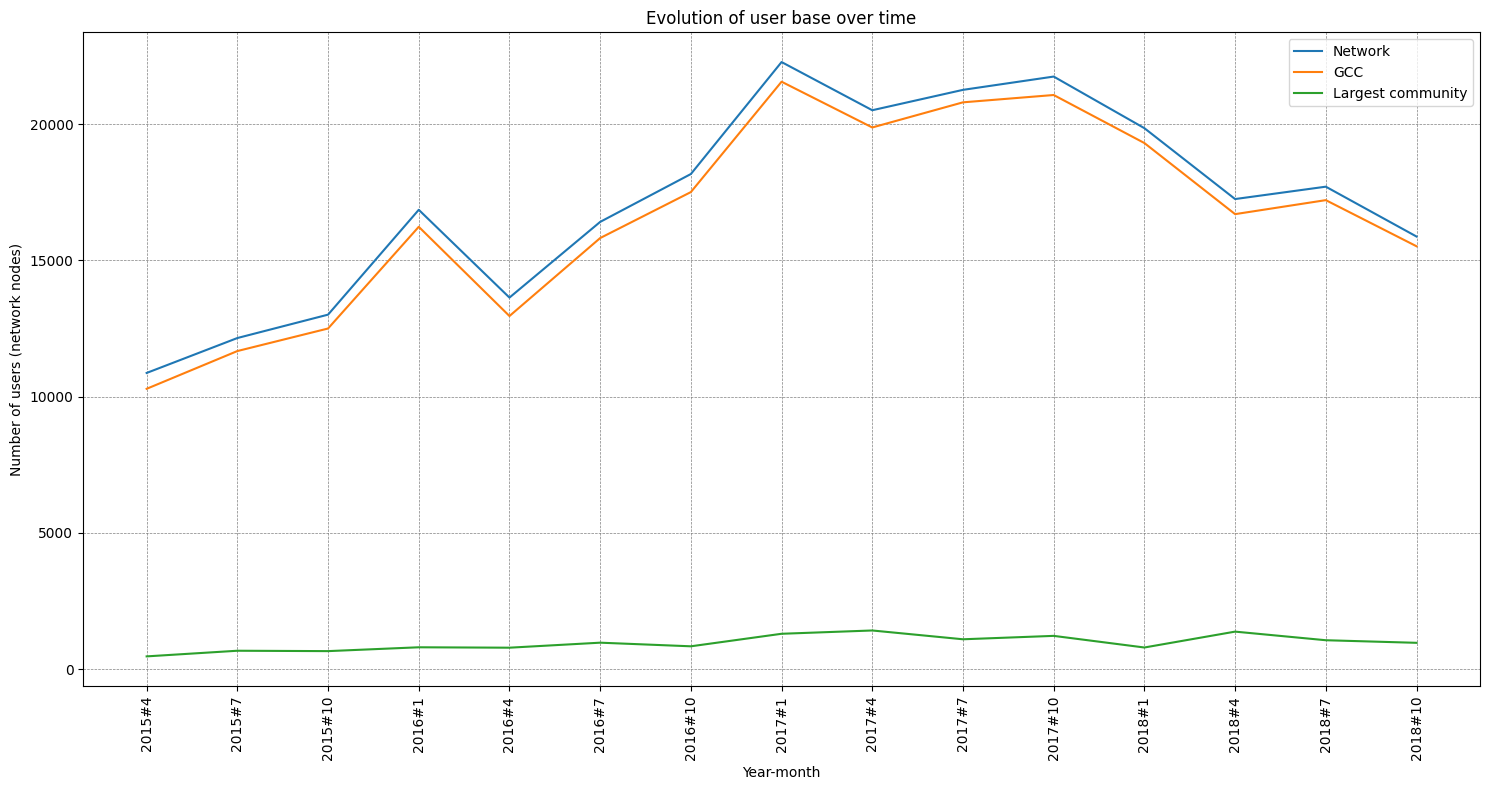

In [6]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-month",
    y_axis_label="Number of users (network nodes)",
    title="Evolution of user base over time",
    save_file="node_counts_over_time.png",
)

### Count of communities detected in the overall network

In [7]:
y_data = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Community count",
    include_network=True,
    include_gcc=False,
    include_largest_community=False,
)

y_data_labels = ("Network",)

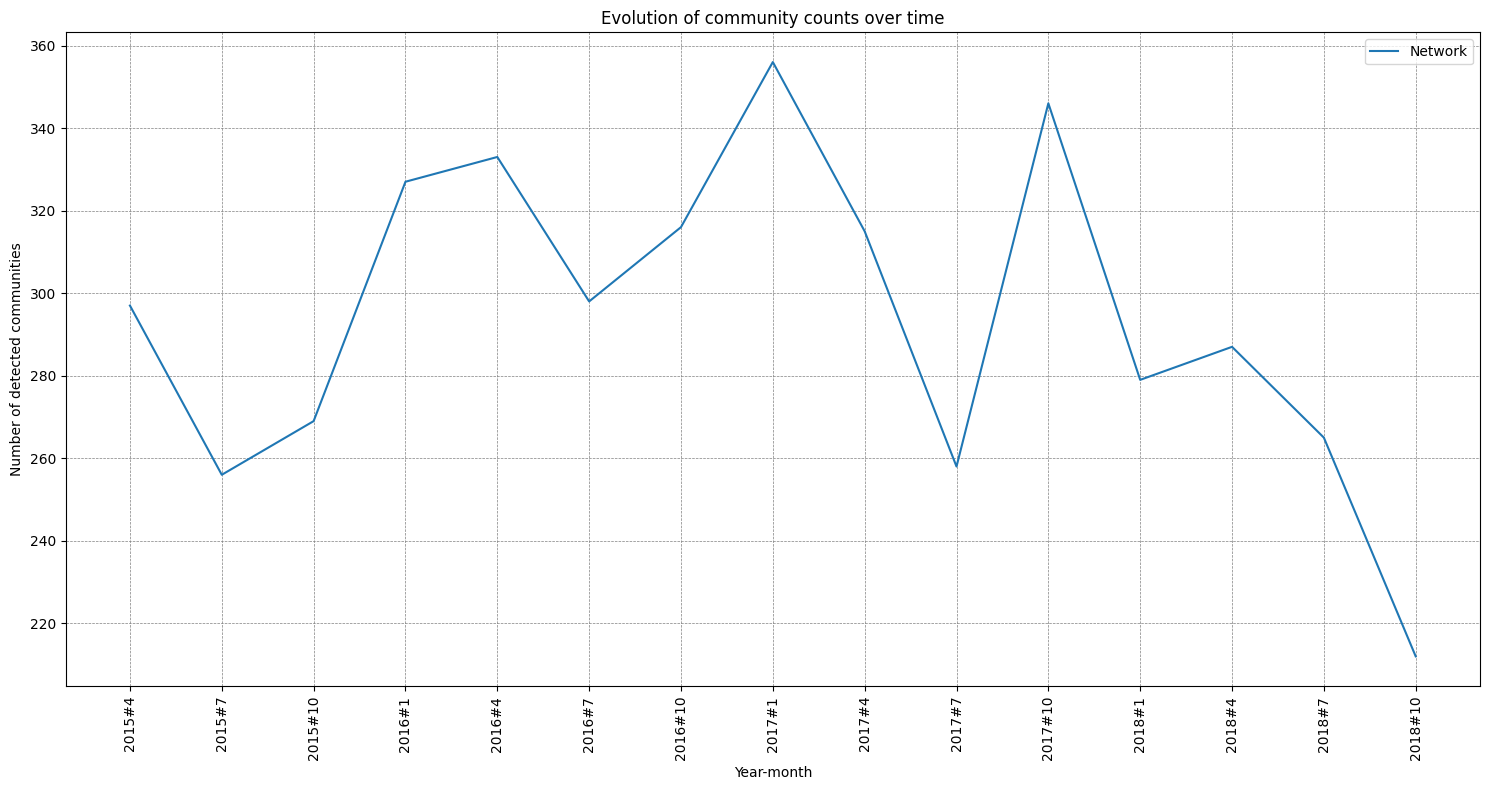

In [8]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-month",
    y_axis_label="Number of detected communities",
    title="Evolution of community counts over time",
    save_file="community_counts_over_time.png",
)

### Community modularity and average internal vs external edge ratio

In [9]:
y_data_1 = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Community modularity",
    include_network=True,
    include_gcc=False,
    include_largest_community=False,
)
y_data_2 = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Average internal vs external edge ratio",
    include_network=True,
    include_gcc=False,
    include_largest_community=False,
)

y_data = (y_data_1[0], y_data_2[0])

y_data_labels = ("Modularity", "Community internal-external edge ratio")

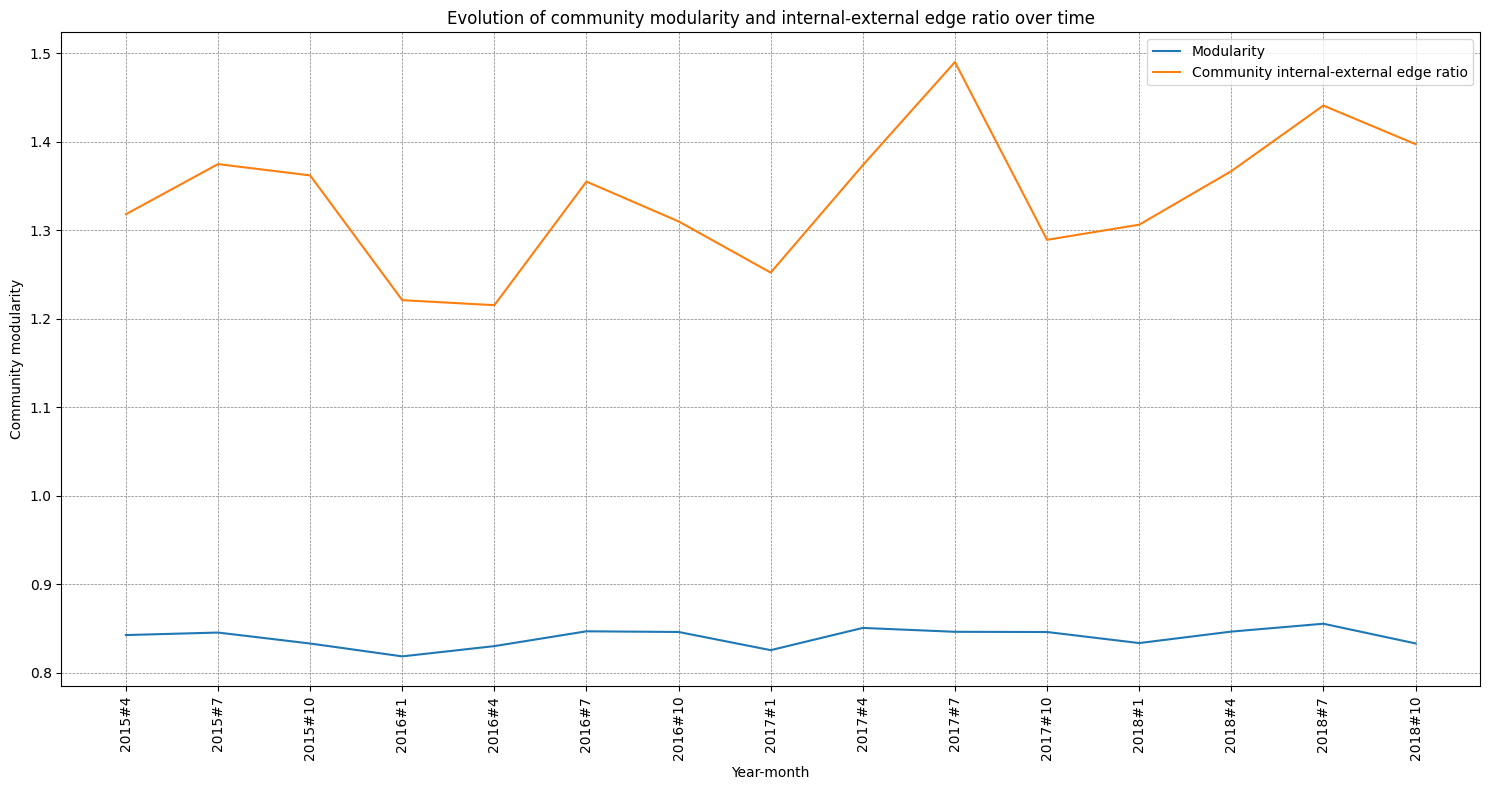

In [10]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-month",
    y_axis_label="Community modularity",
    title="Evolution of community modularity and internal-external edge ratio over time",
    save_file="community_modularity_and_edge_ratio_over_time.png",
)

### Network density in the overall network, in the GCC and in the largest community

In [11]:
y_data = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Density",
    include_network=True,
    include_gcc=True,
    include_largest_community=True,
)

y_data_labels = ("Network", "GCC", "Largest community")

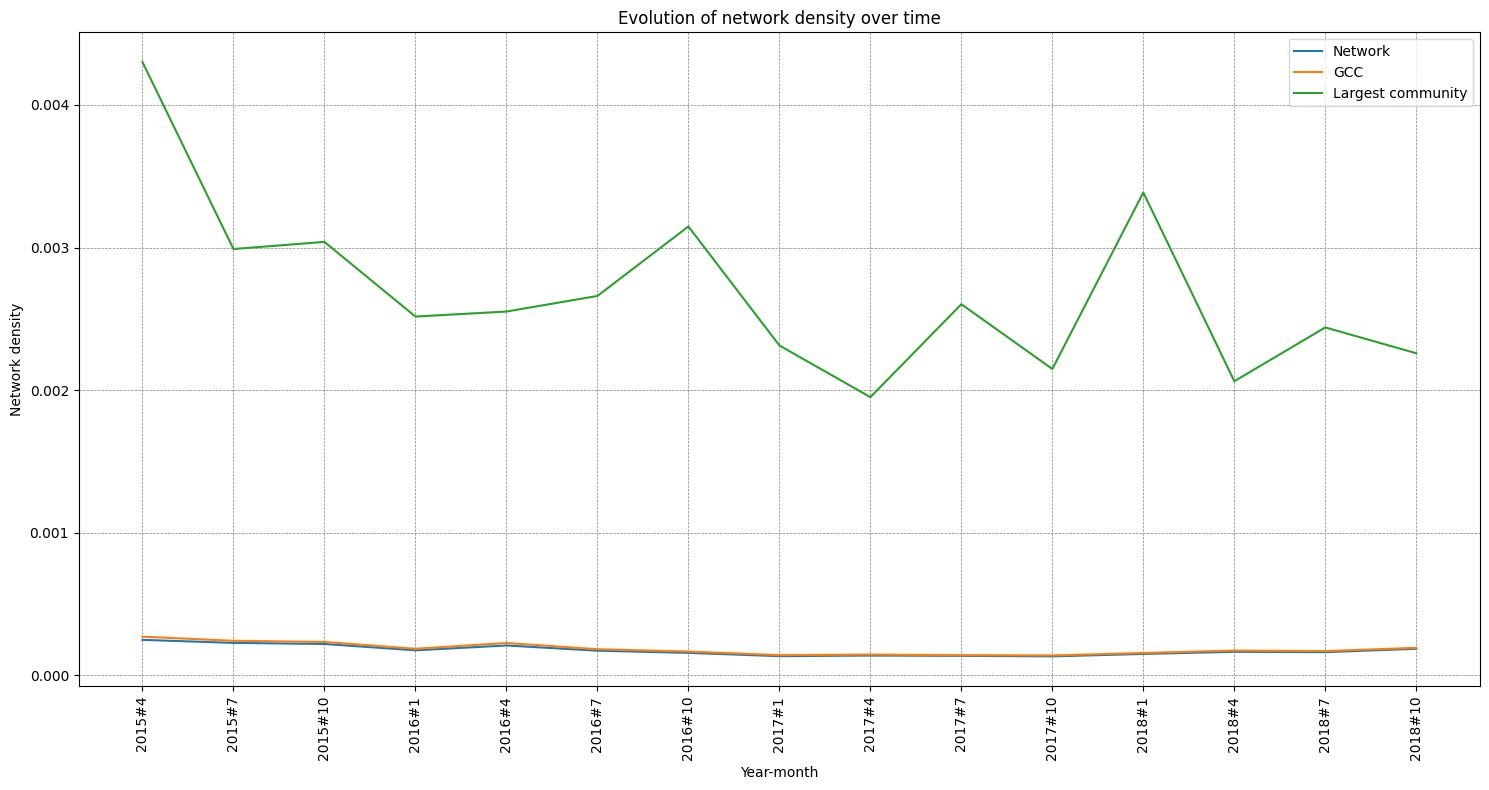

In [12]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-month",
    y_axis_label="Network density",
    title="Evolution of network density over time",
    save_file="density_over_time.png",
)

### Diameter and average shortest path length in the GCC

In [13]:
y_data_1 = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Diameter",
    include_network=False,
    include_gcc=True,
    include_largest_community=False,
)

y_data_2 = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Average shortest path",
    include_network=False,
    include_gcc=True,
    include_largest_community=False,
)

y_data = (y_data_1[0], y_data_2[0])

y_data_labels = ("Diameter", "Average shortest path")

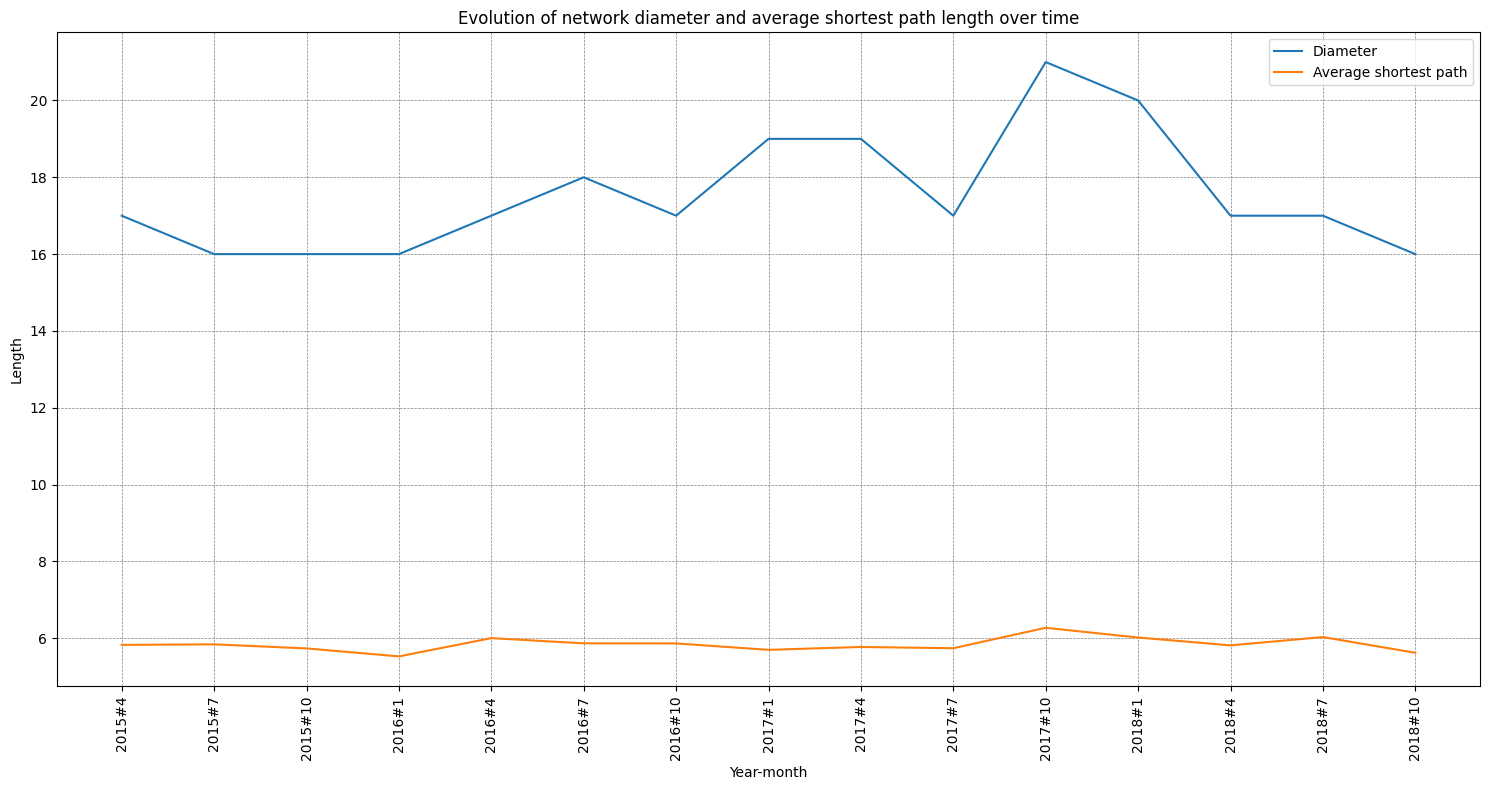

In [14]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-month",
    y_axis_label="Length",
    title="Evolution of network diameter and average shortest path length over time",
    save_file="shortest_path_length_over_time.png",
)

### Network assortativity in the overall network, in the GCC and in the largest community

In [15]:
y_data = viz.create_y_series_metrics(
    sorted_periods=sorted_periods,
    df_metrics=df_metrics,
    metric_name="Assortativity",
    include_network=True,
    include_gcc=True,
    include_largest_community=True,
)

y_data_labels = ("Network", "GCC", "Largest community")

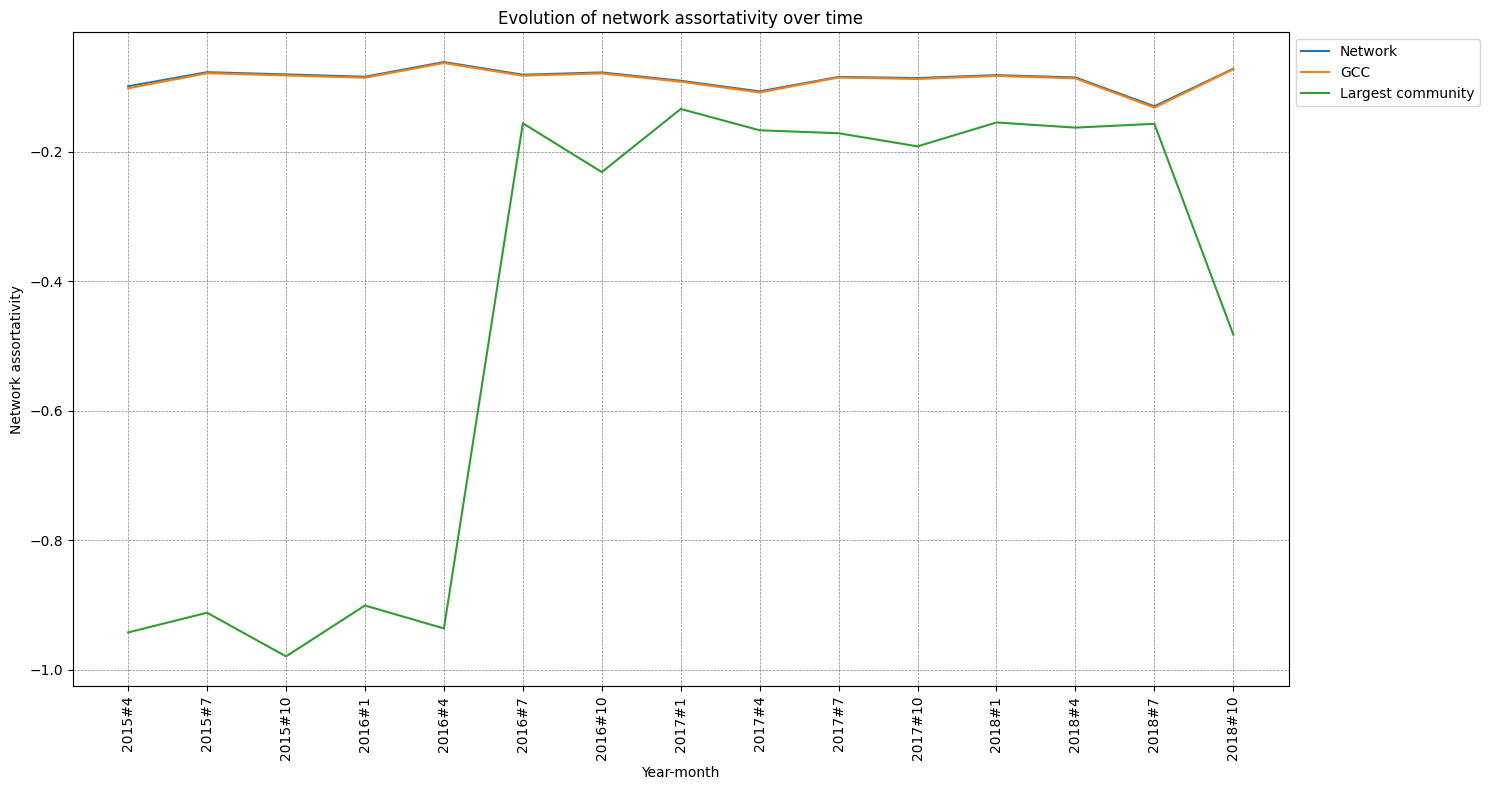

In [16]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-month",
    y_axis_label="Network assortativity",
    title="Evolution of network assortativity over time",
    save_file="assortativity_over_time.png",
)

### Node degree distributions

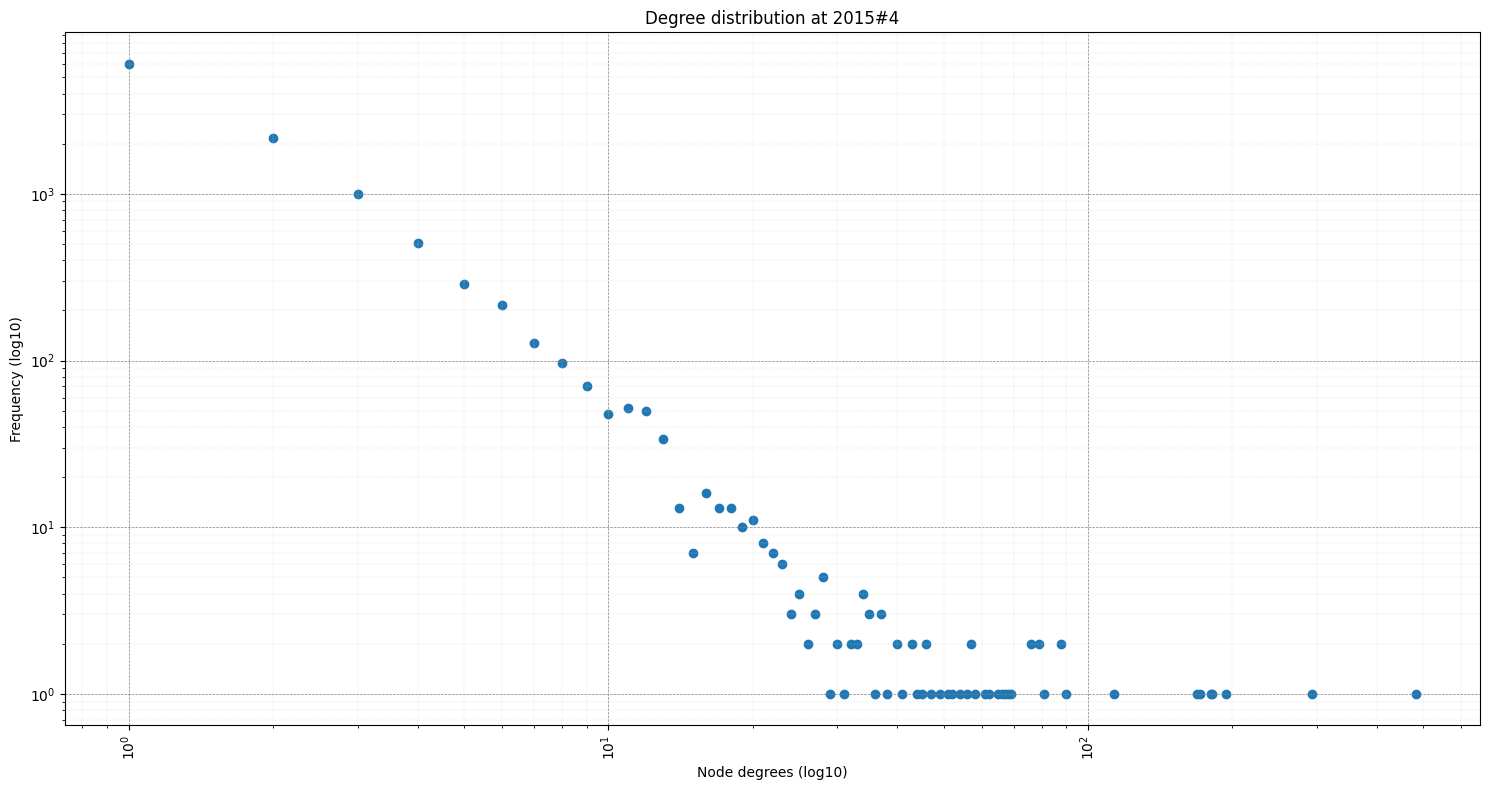

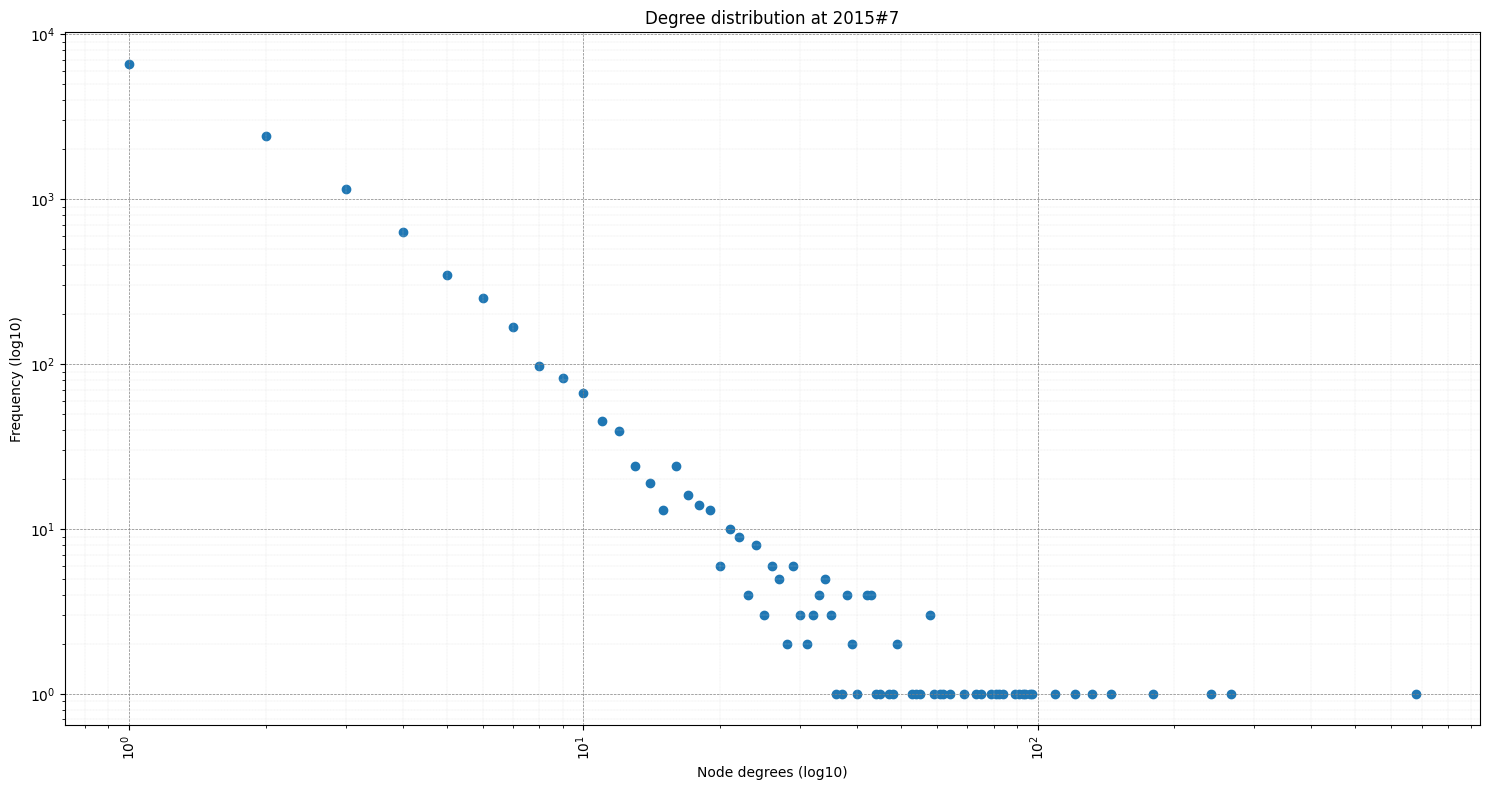

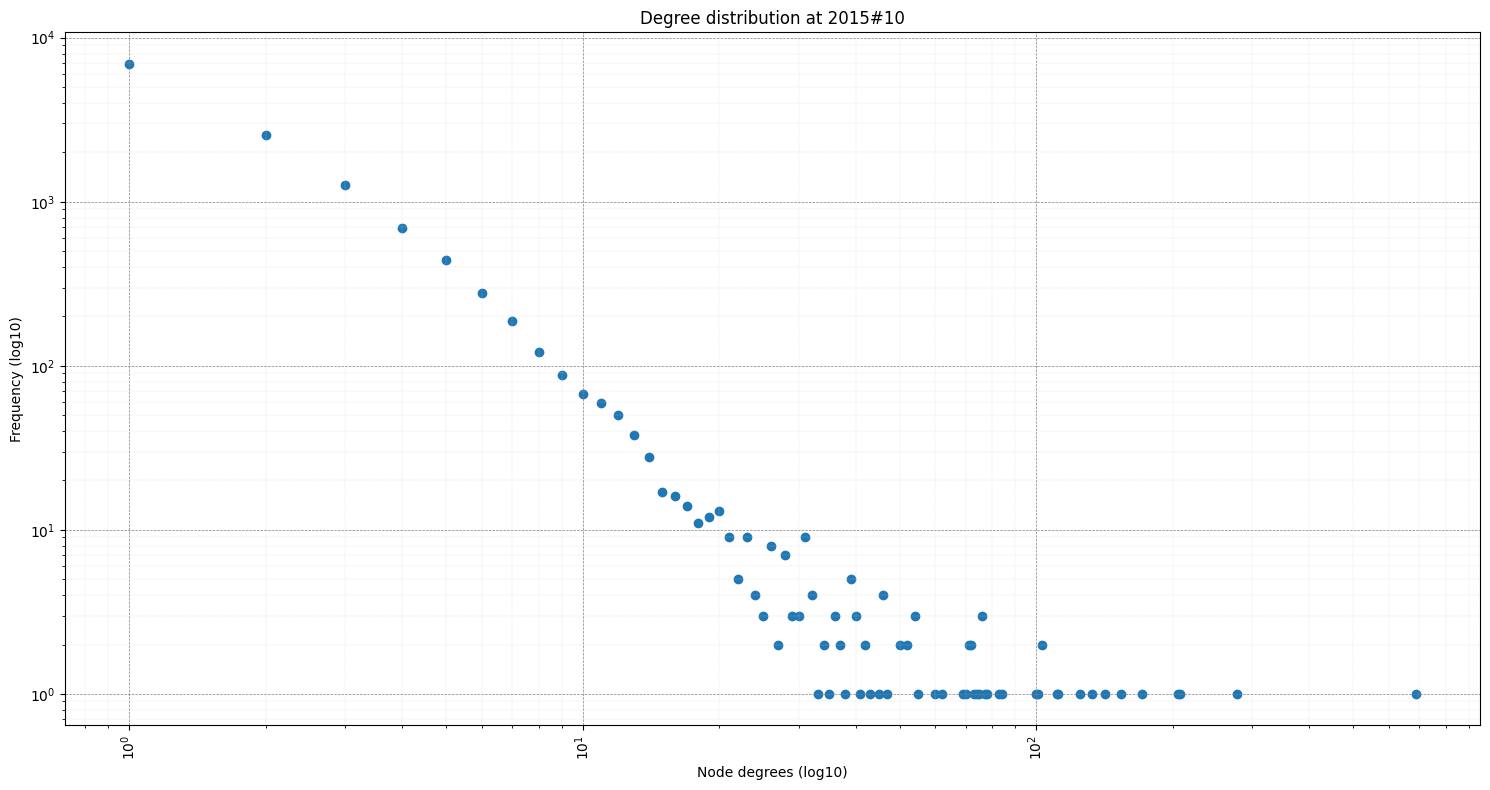

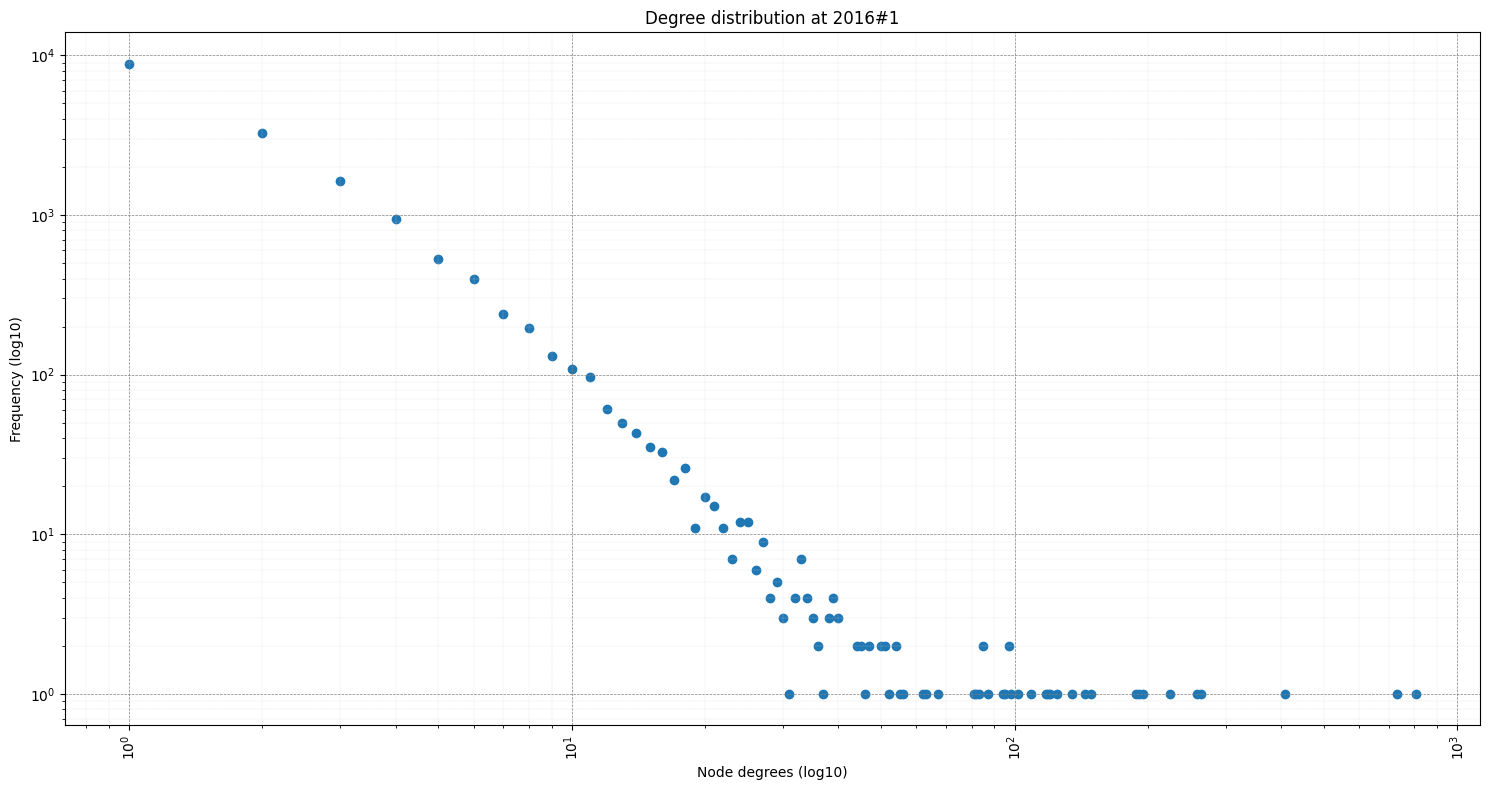

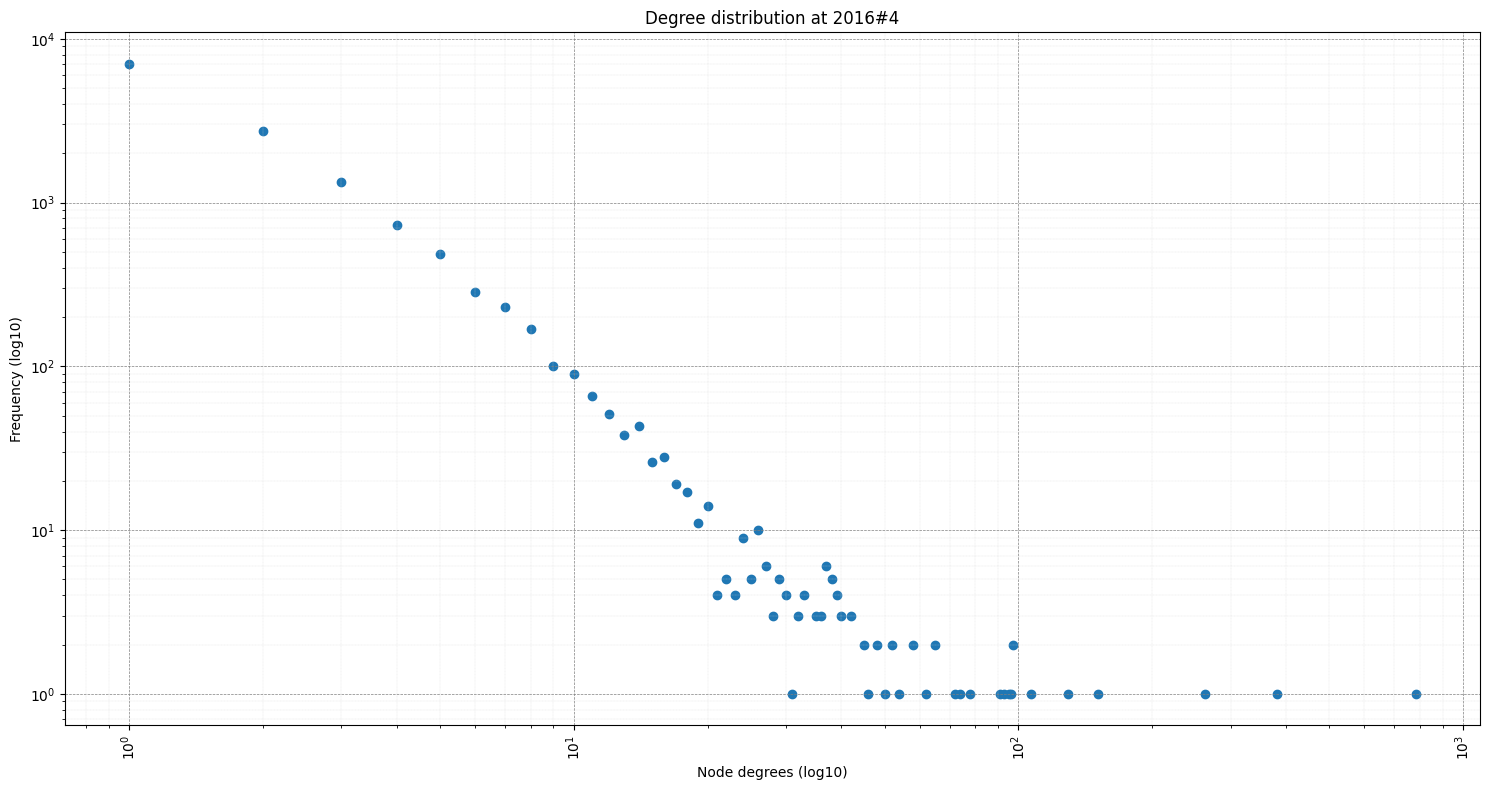

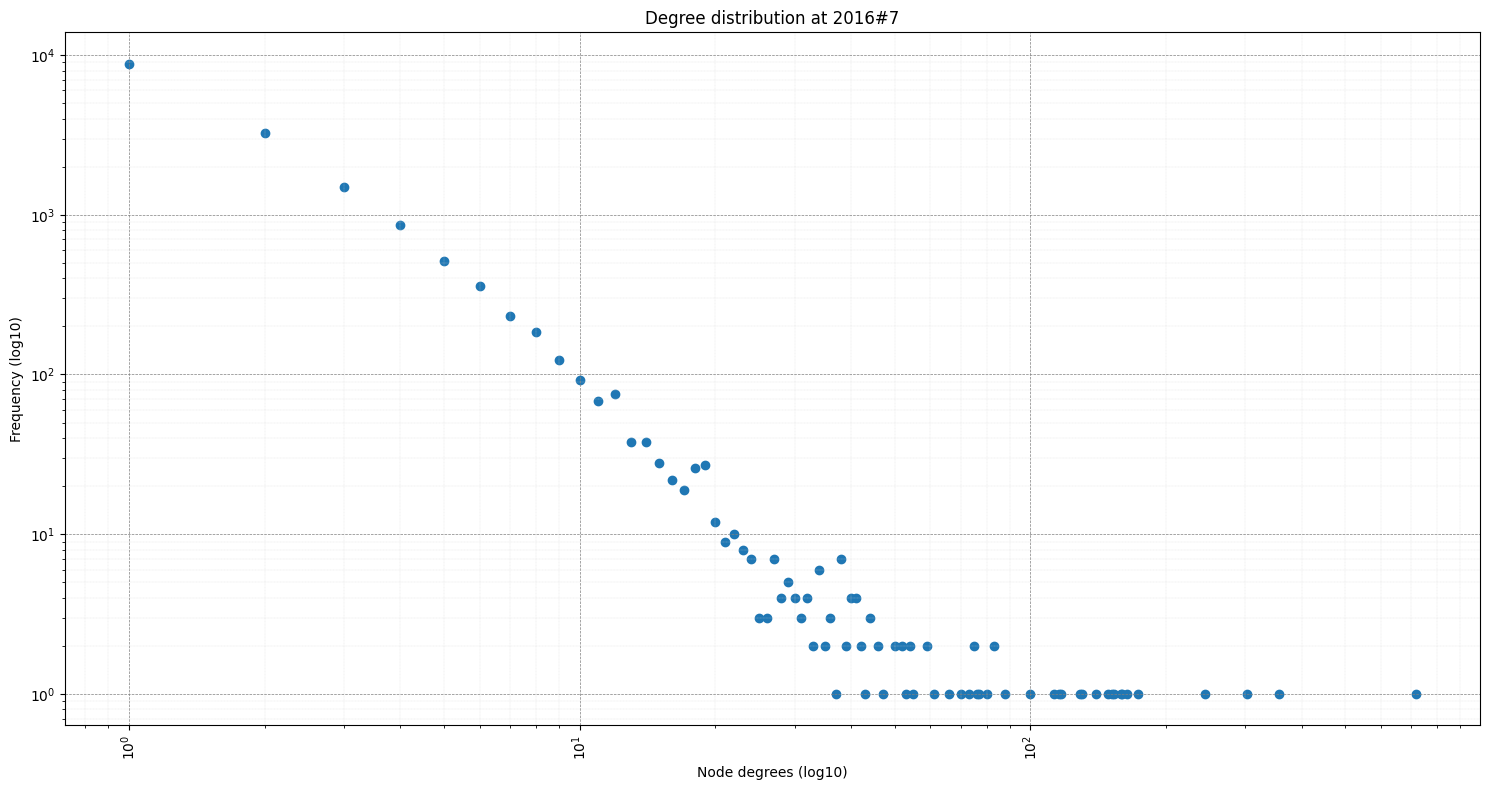

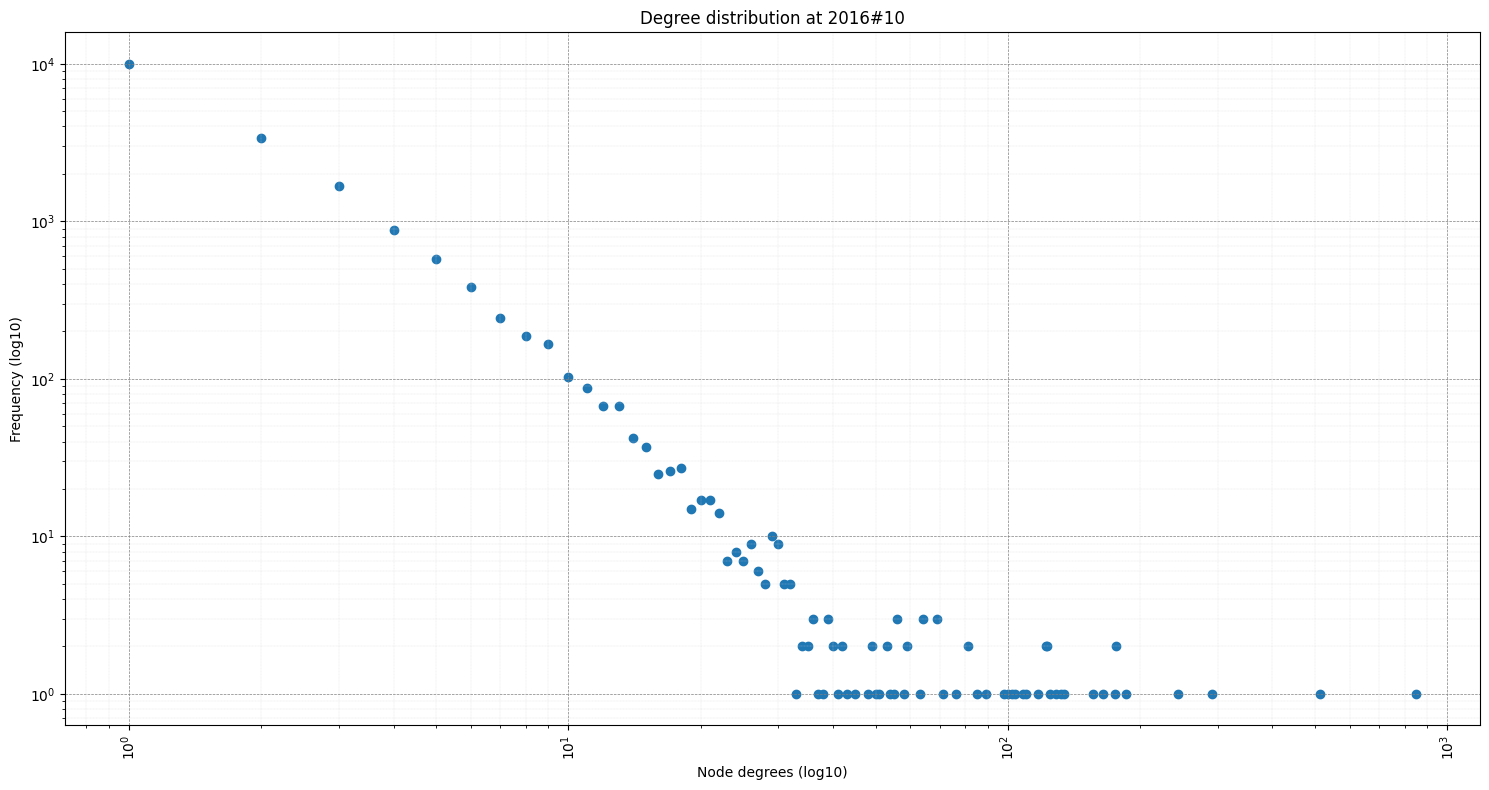

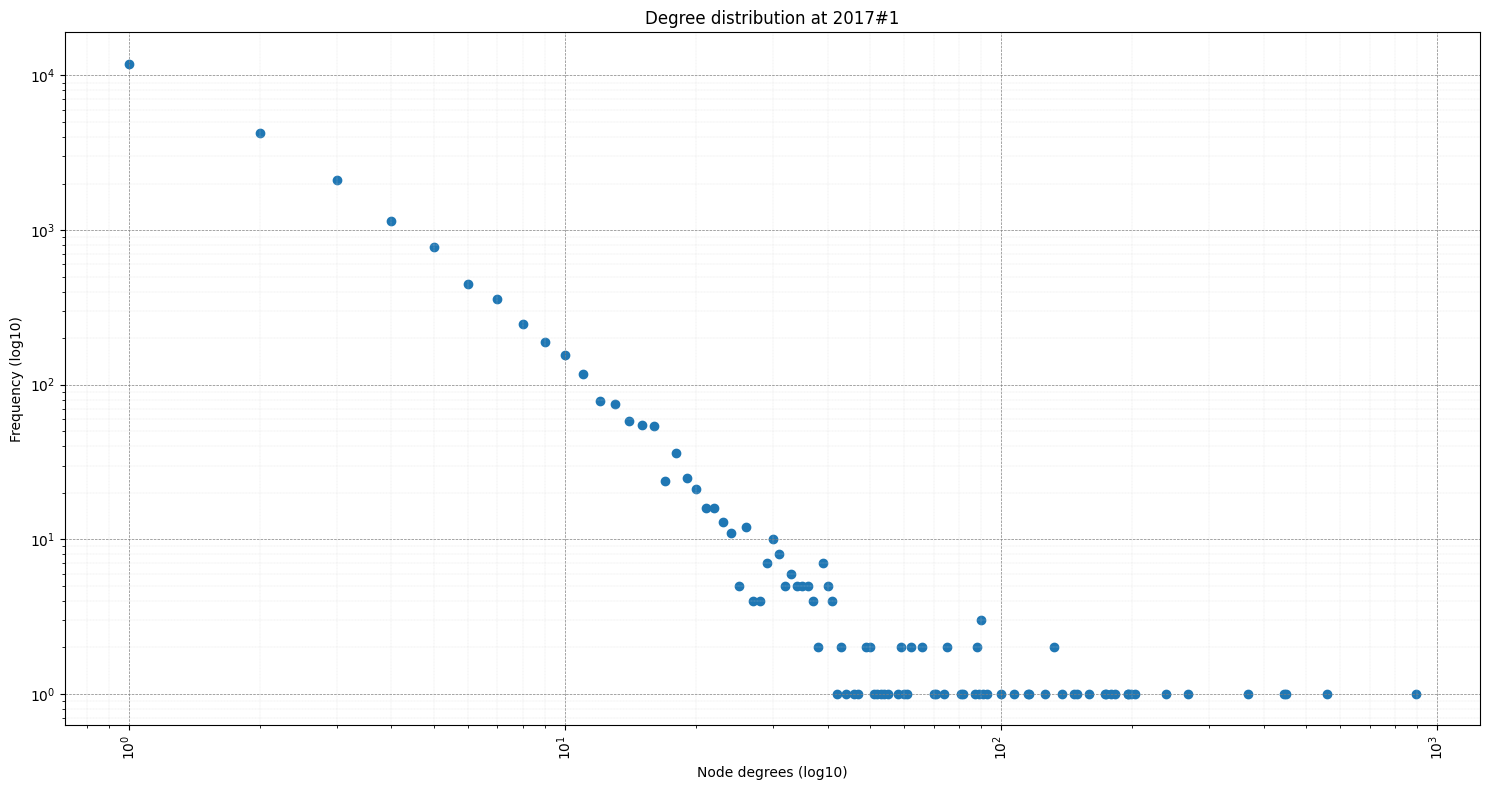

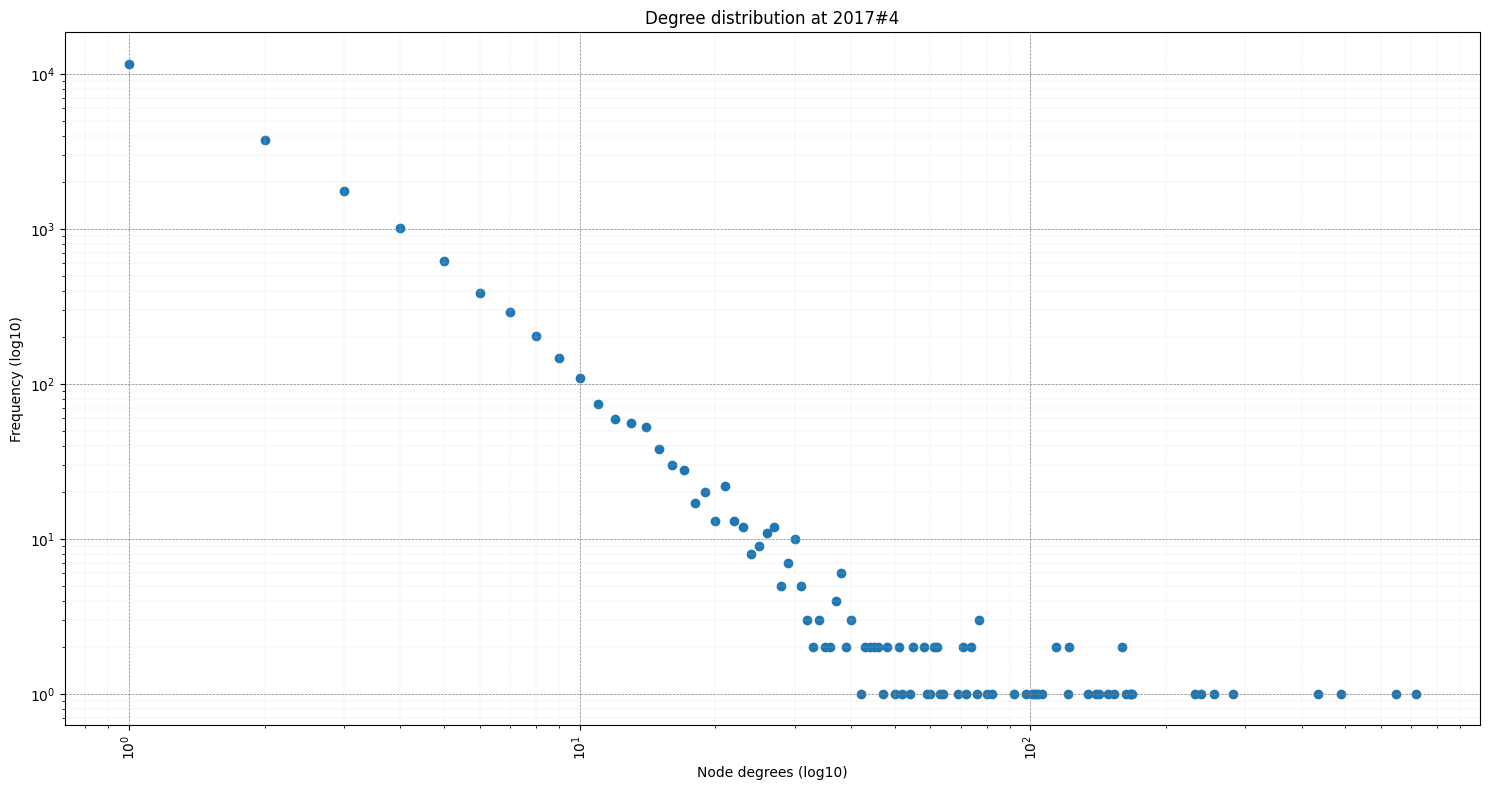

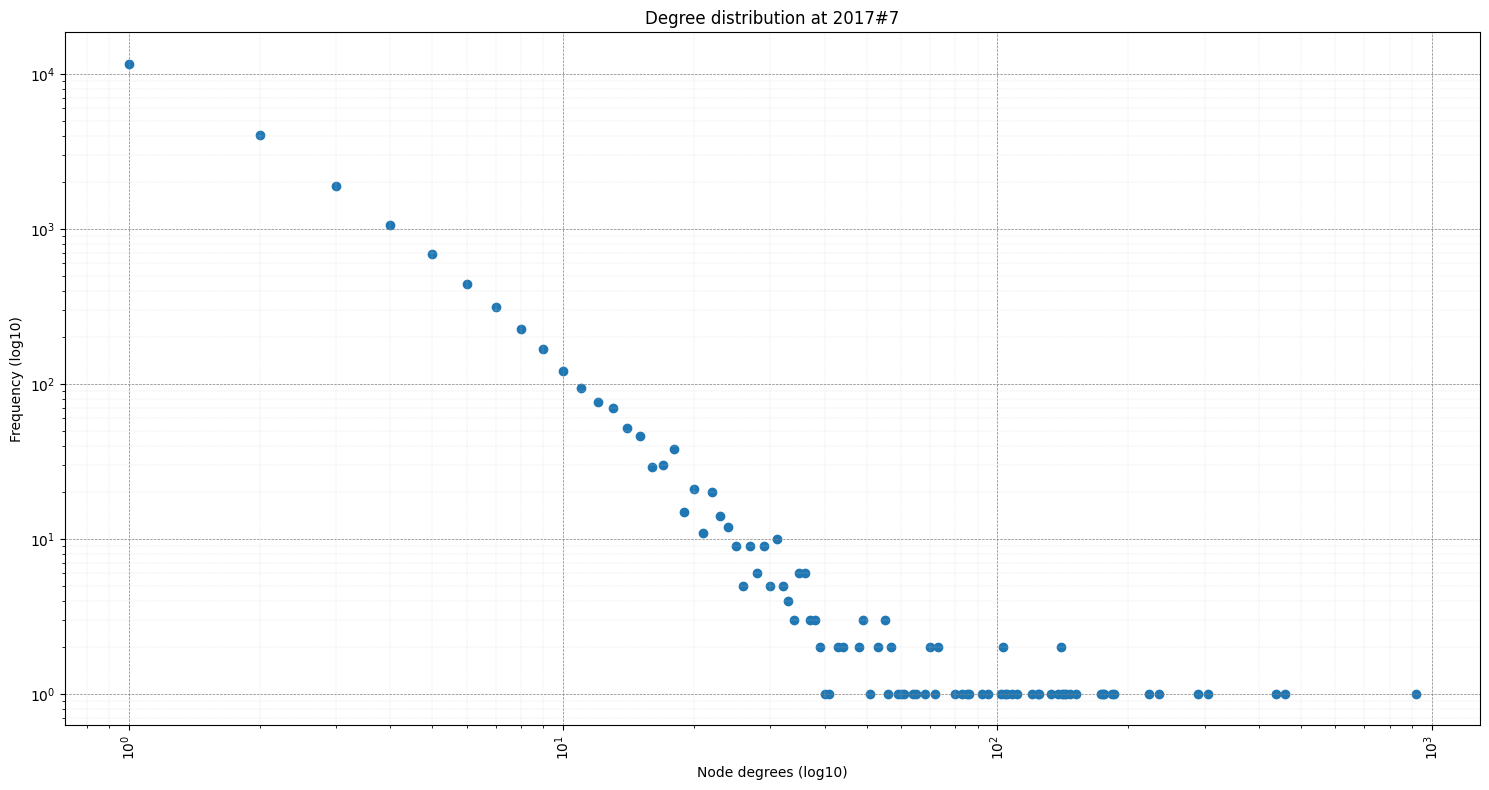

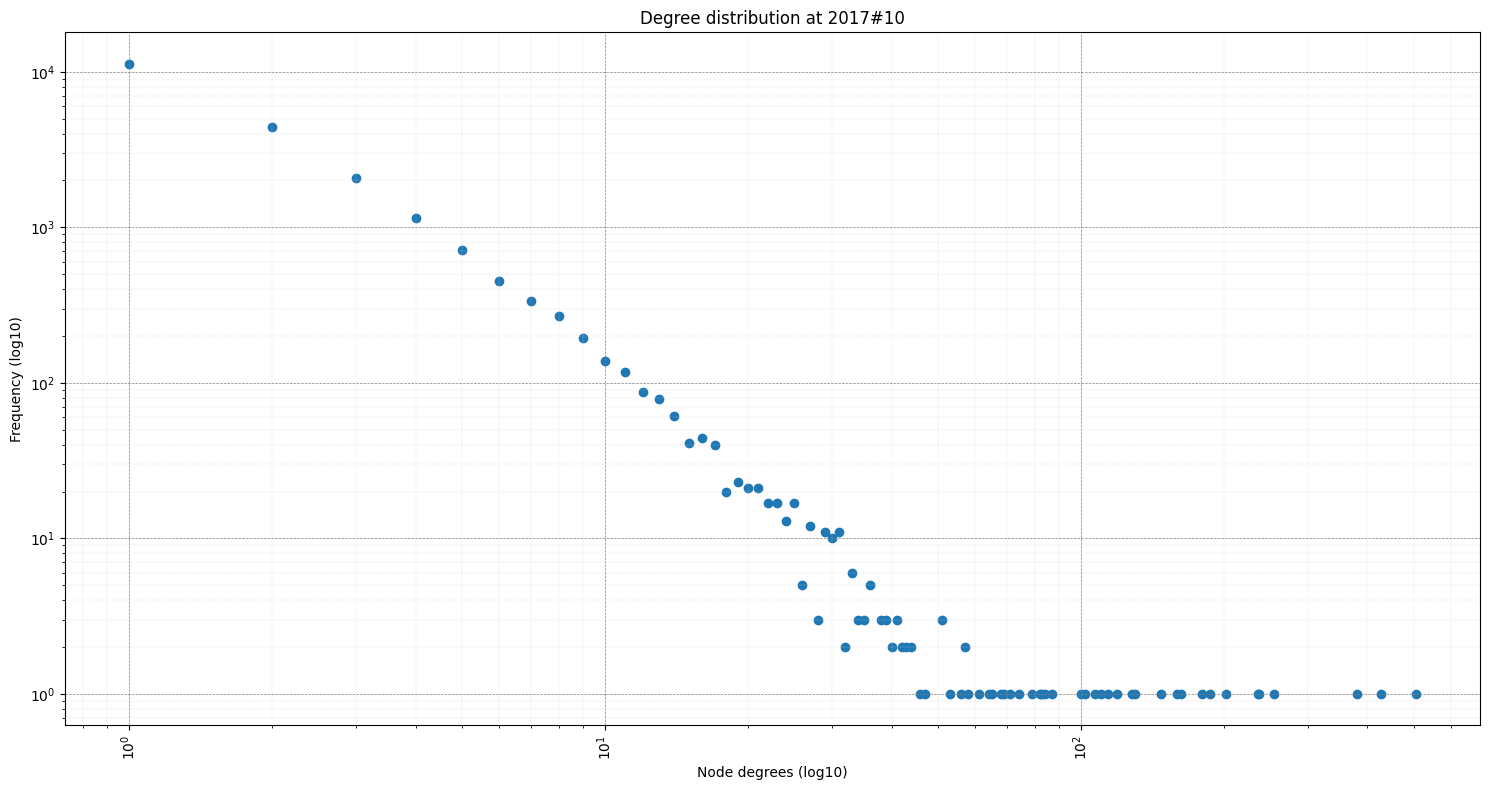

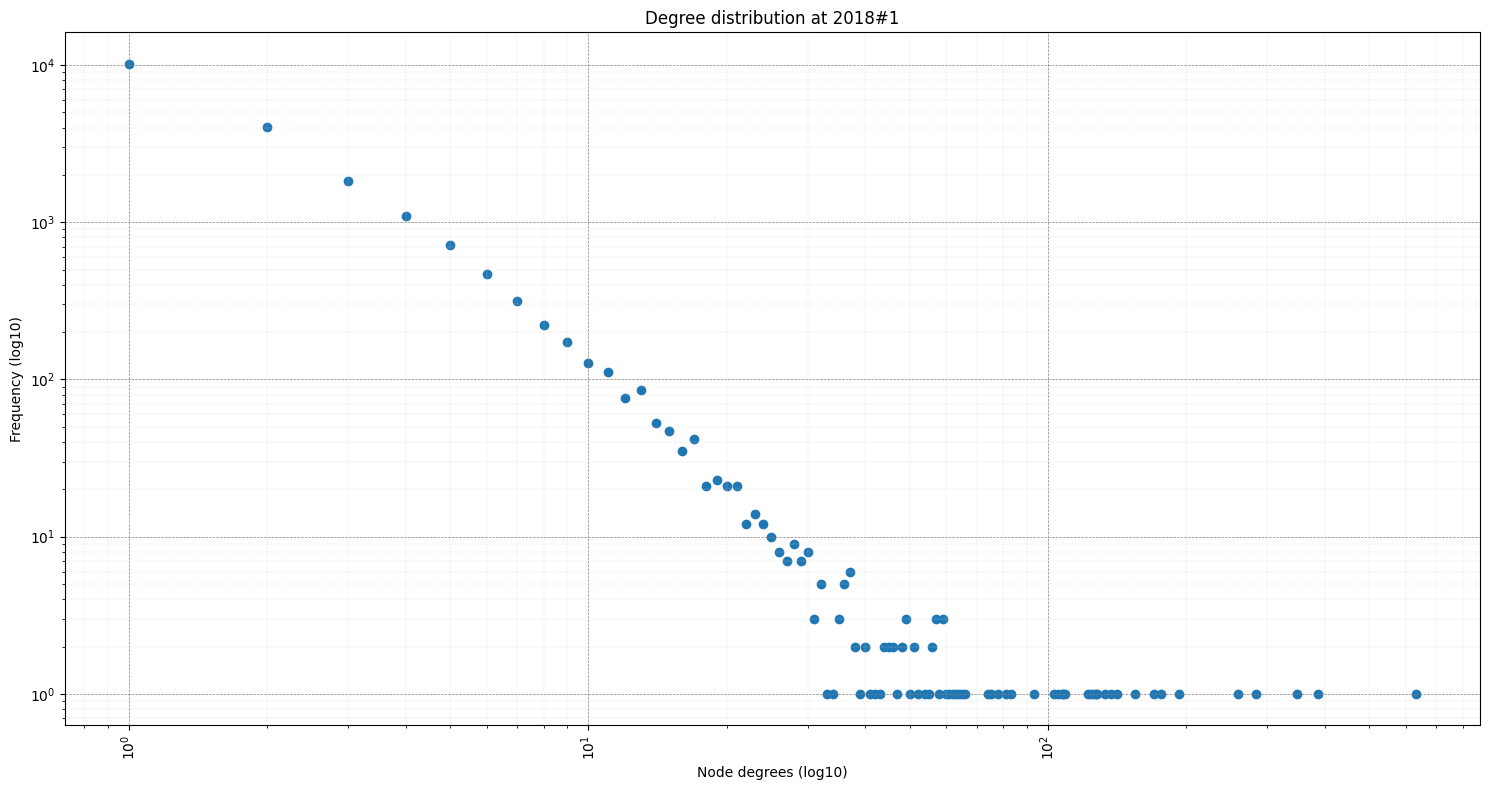

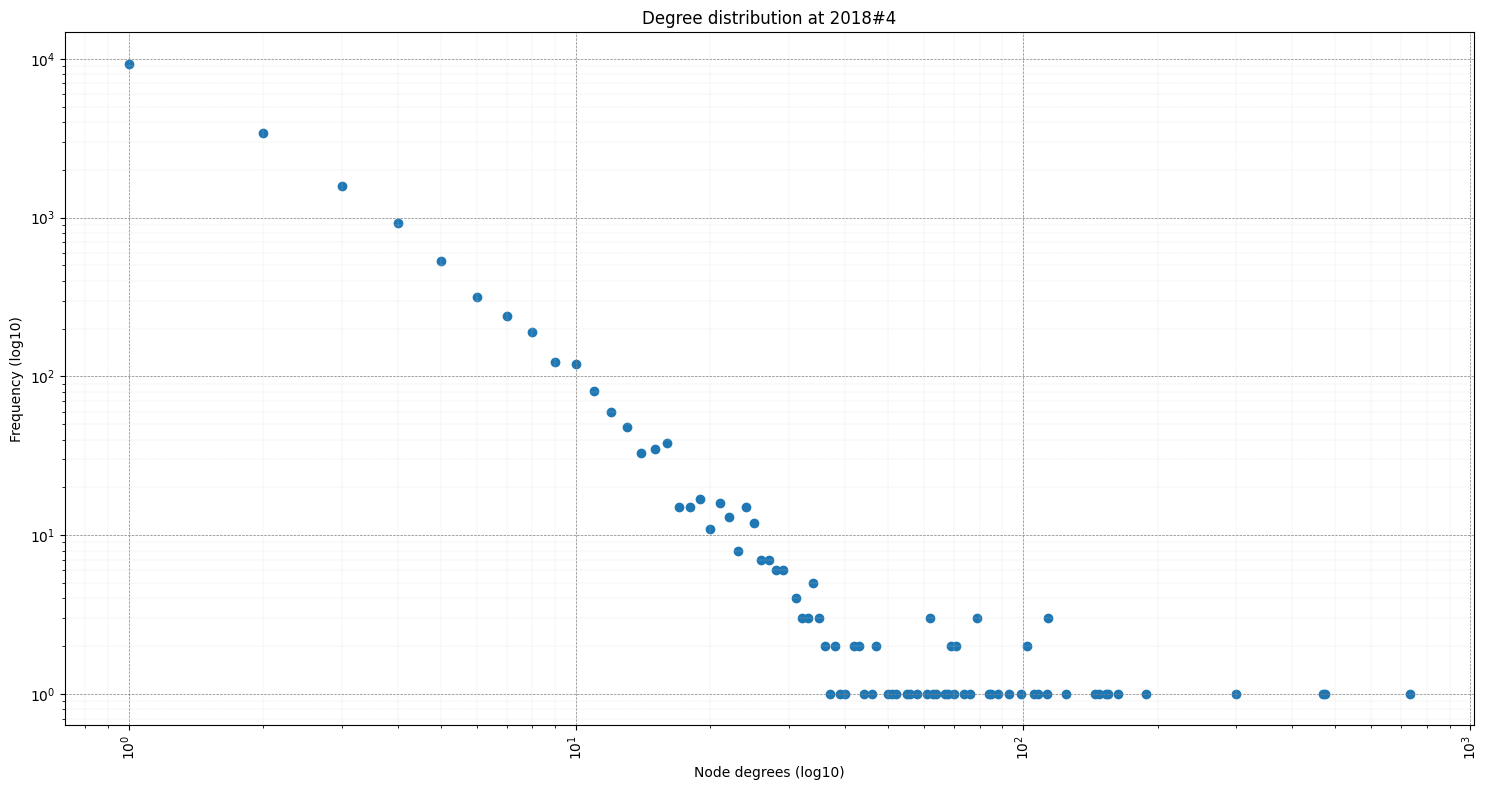

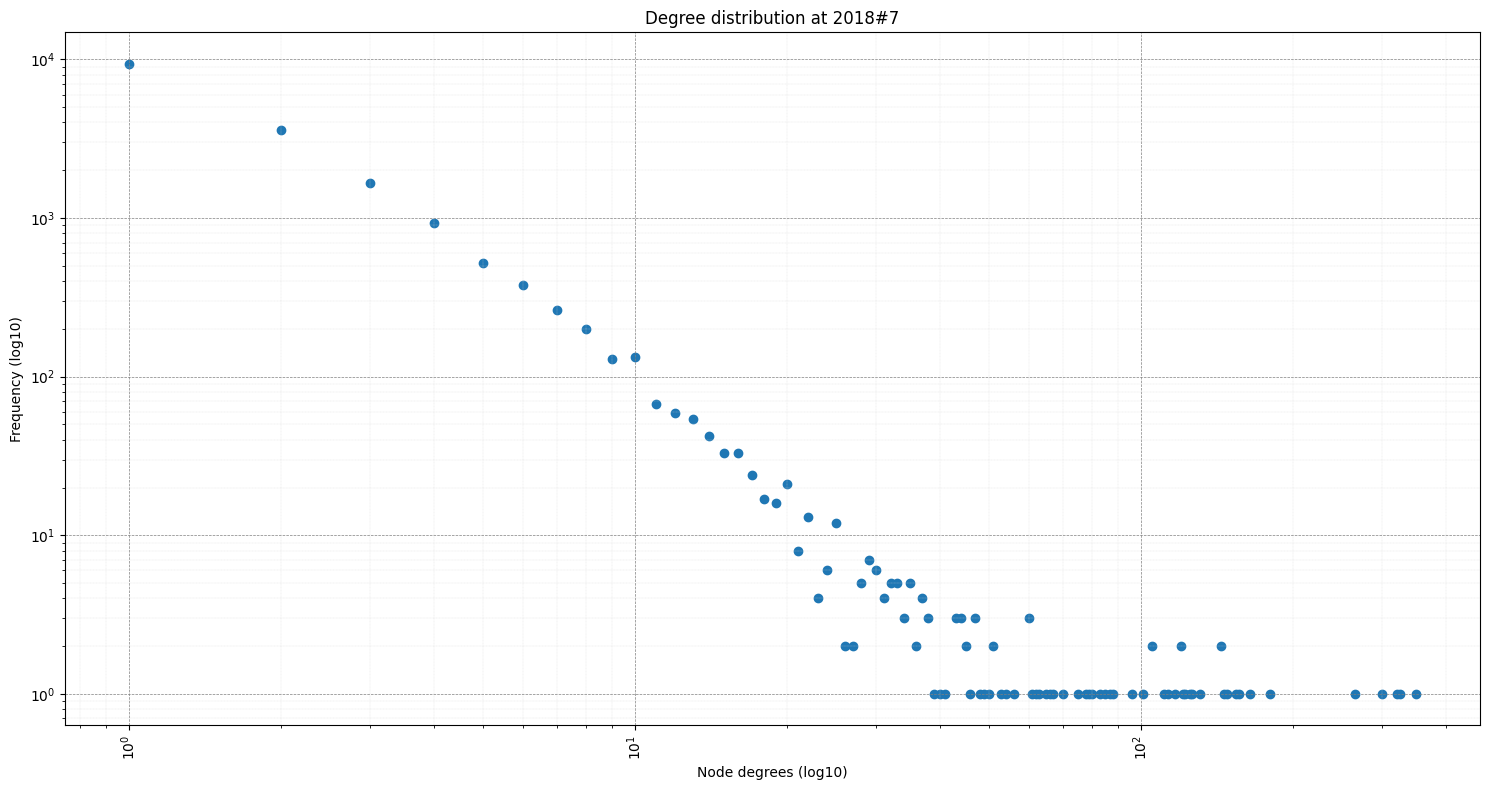

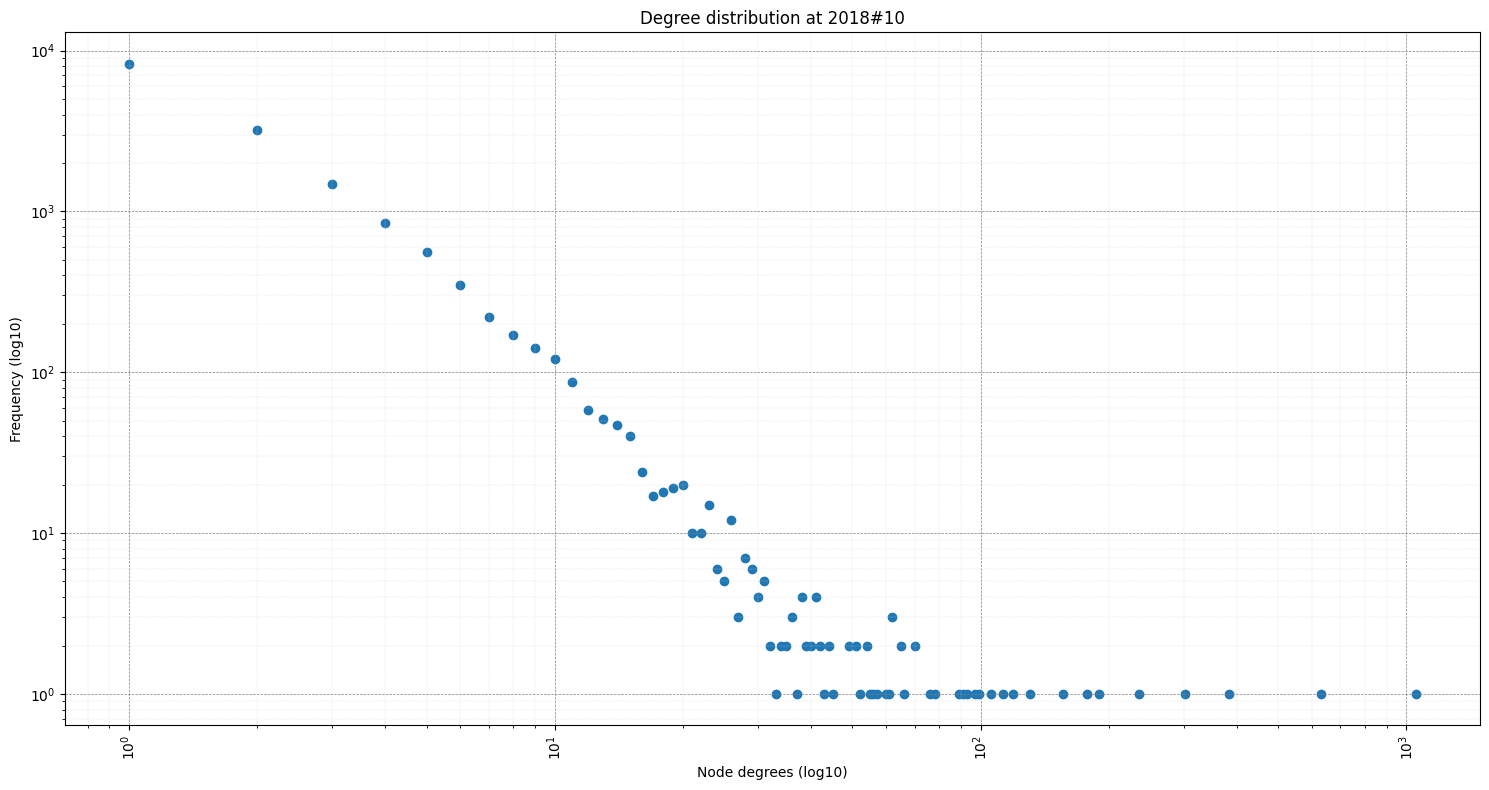

In [17]:
for p in sorted_periods:
    viz.create_plot(
        x_data=distributions[p]["degrees"],
        y_data=None,
        y_data_labels=None,
        x_axis_label="Node degrees",
        y_axis_label="Frequency",
        title=f"Degree distribution at {p}",
        is_histogram=True,
        log_scaled=True,
        log_axes="xy",
        save_file=f"degree_distribution_{p}.png",
    )

### Size of connected components

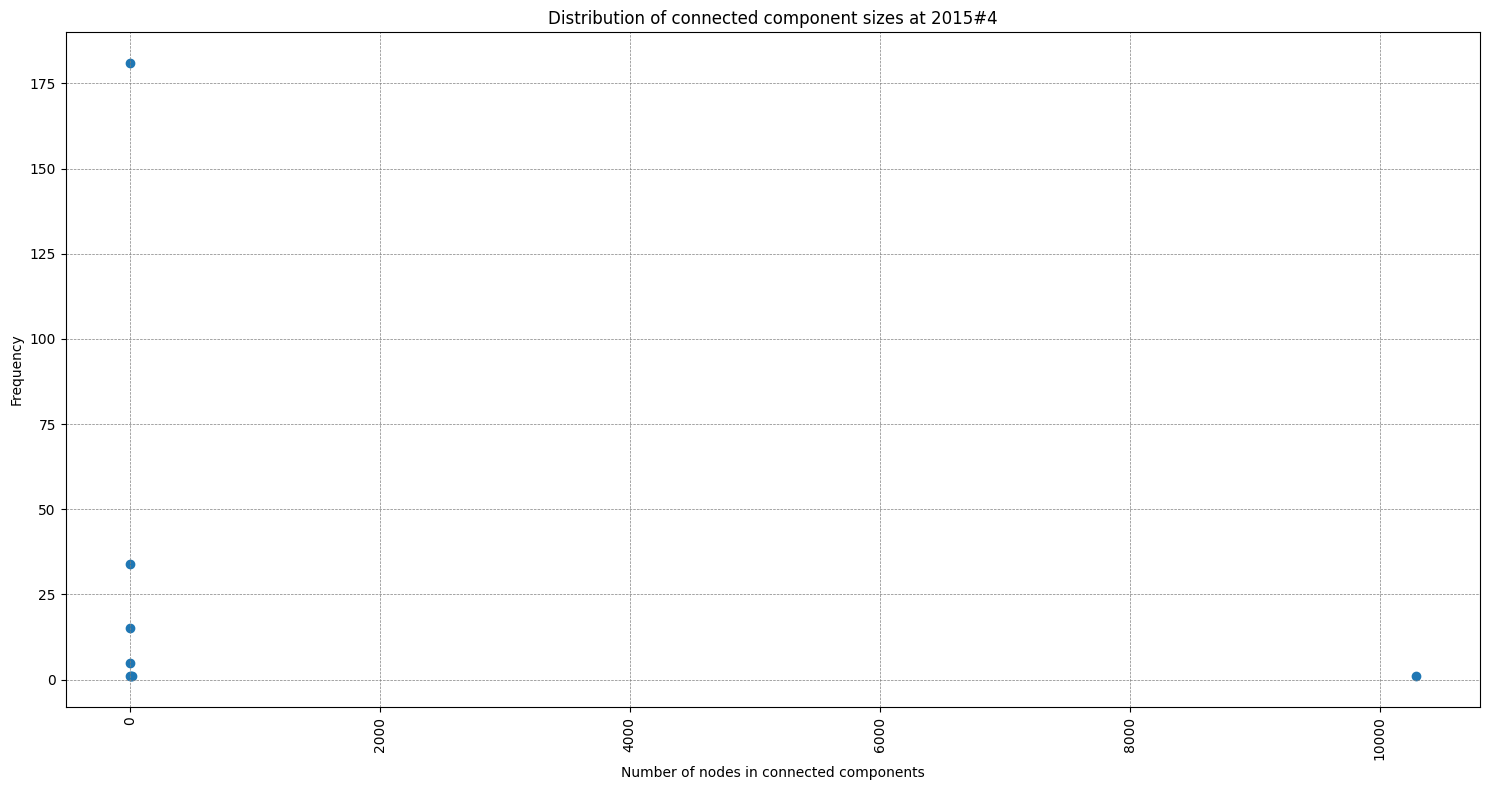

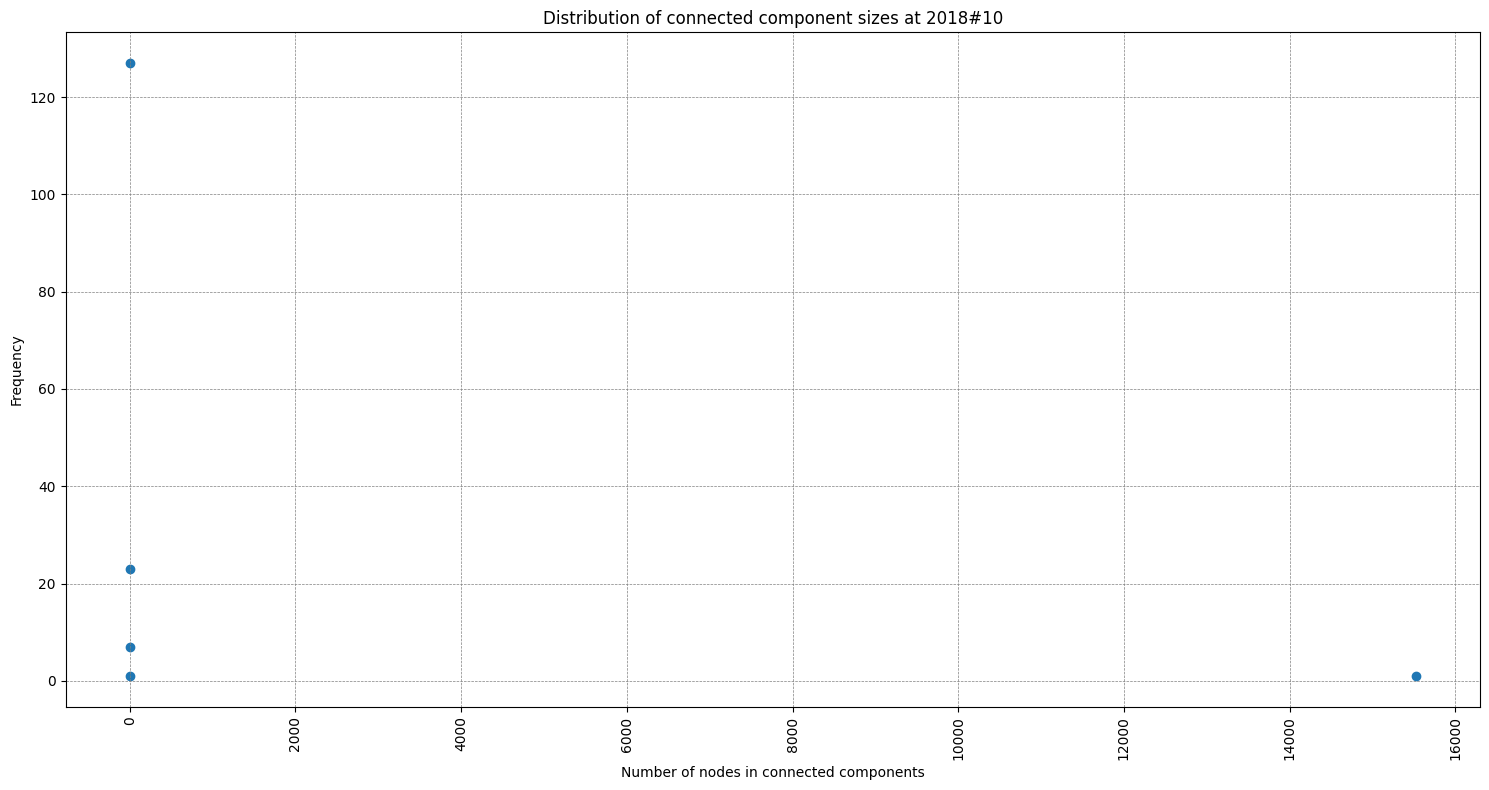

In [18]:
for p in (sorted_periods[0], sorted_periods[-1]):
    viz.create_plot(
        x_data=distributions[p]["connected_component_sizes"],
        y_data=None,
        y_data_labels=None,
        x_axis_label="Number of nodes in connected components",
        y_axis_label="Frequency",
        title=f"Distribution of connected component sizes at {p}",
        is_histogram=True,
        save_file=f"connected_component_sizes_{p}.png",
    )

### Clustering coefficient distribution

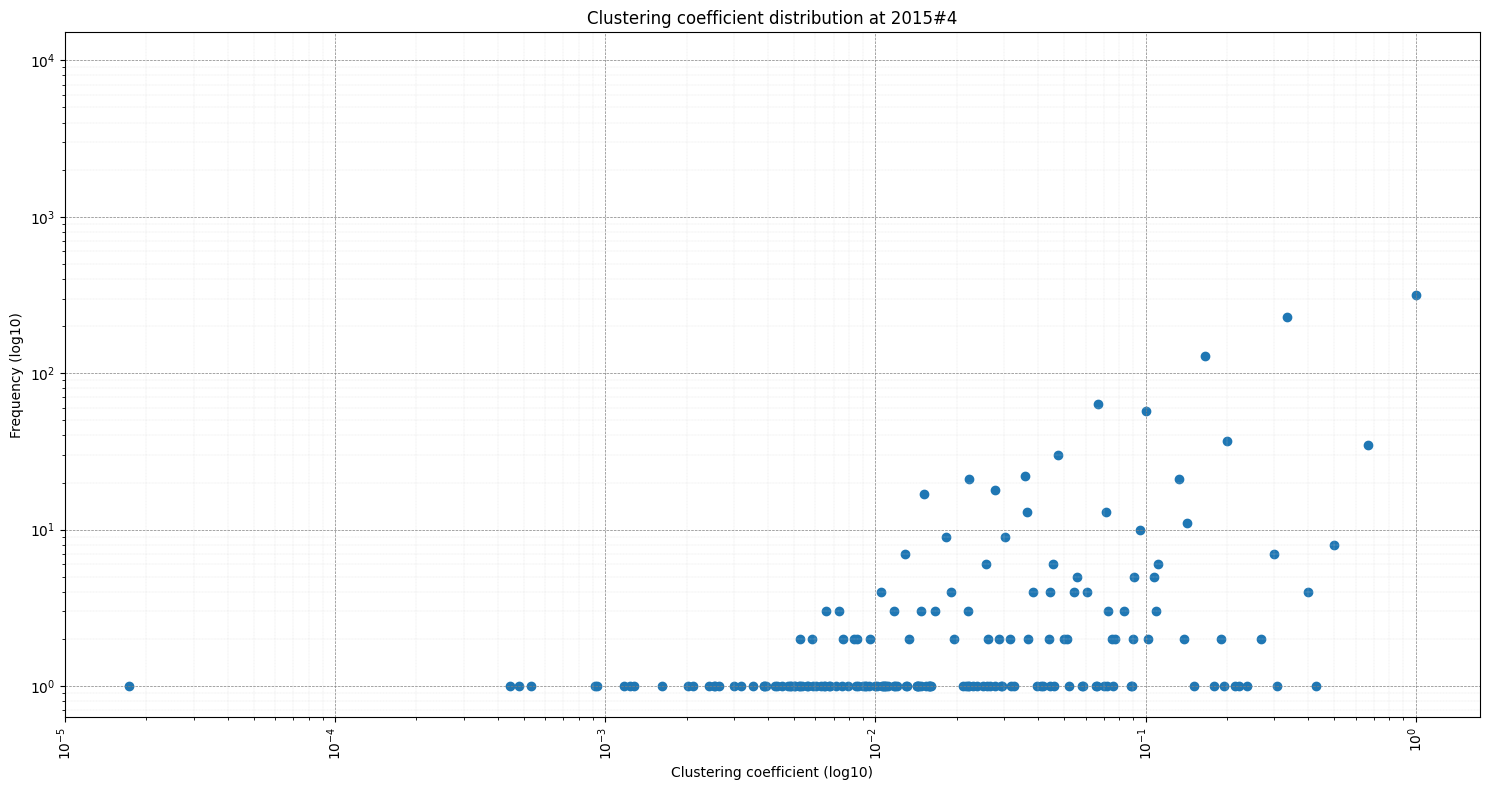

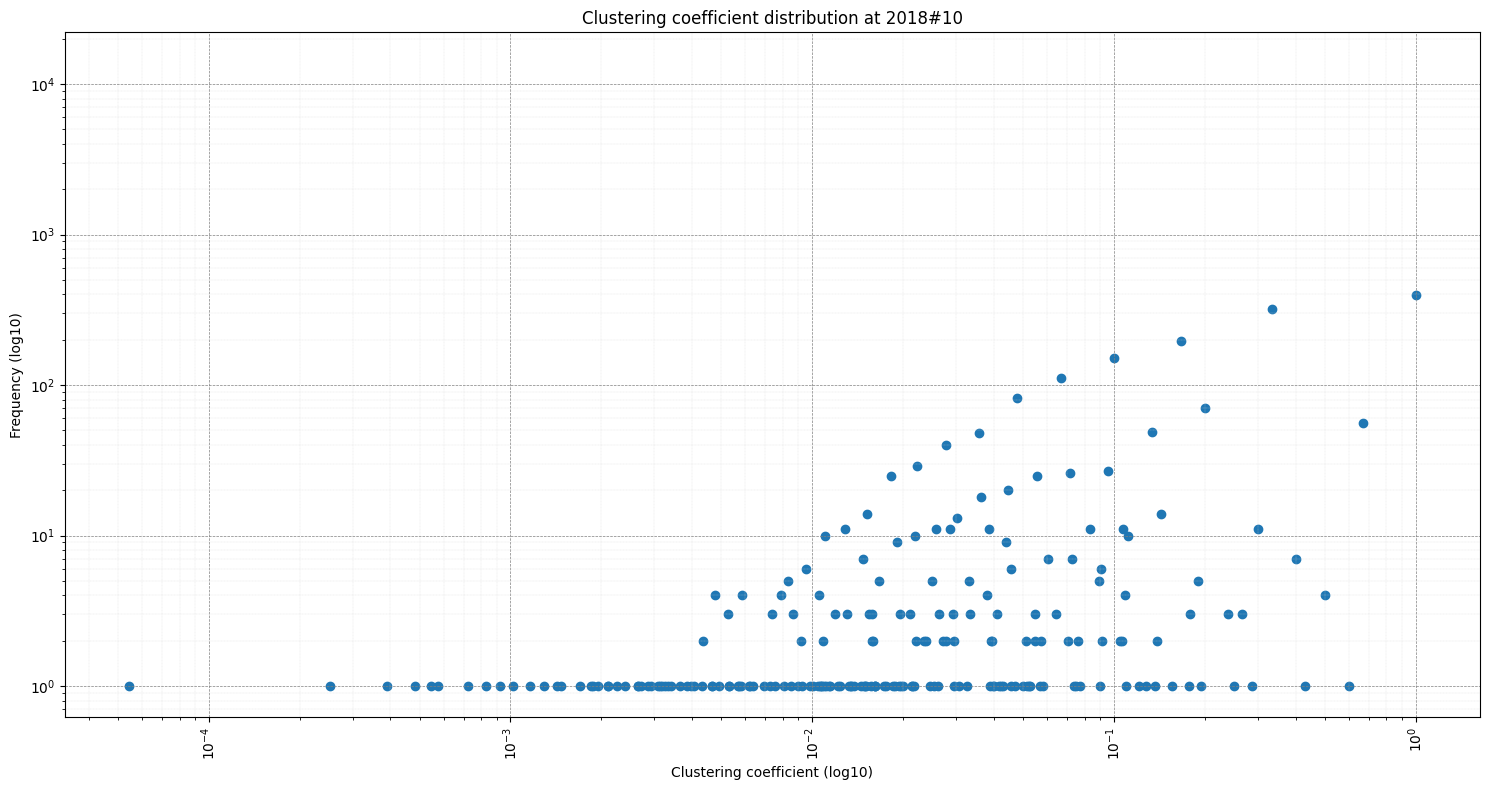

In [19]:
for p in (sorted_periods[0], sorted_periods[-1]):
    viz.create_plot(
        x_data=distributions[p]["clustering_coefficient"],
        y_data=None,
        y_data_labels=None,
        x_axis_label="Clustering coefficient",
        y_axis_label="Frequency",
        title=f"Clustering coefficient distribution at {p}",
        is_histogram=True,
        log_scaled=True,
        log_axes="xy",
        save_file=f"clustering_coefficient_distribution_{p}.png",
    )

### Betweenness centrality distribution

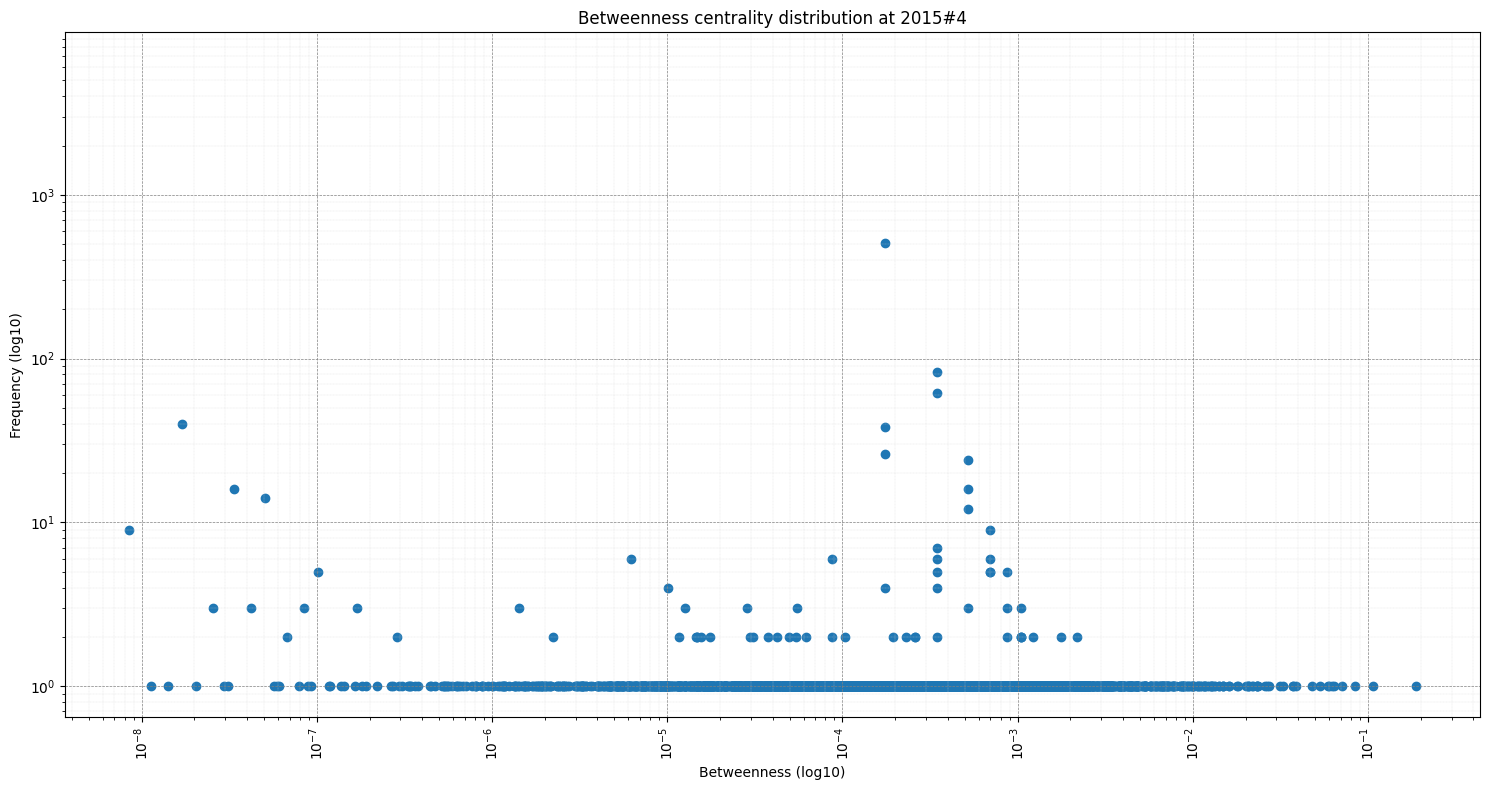

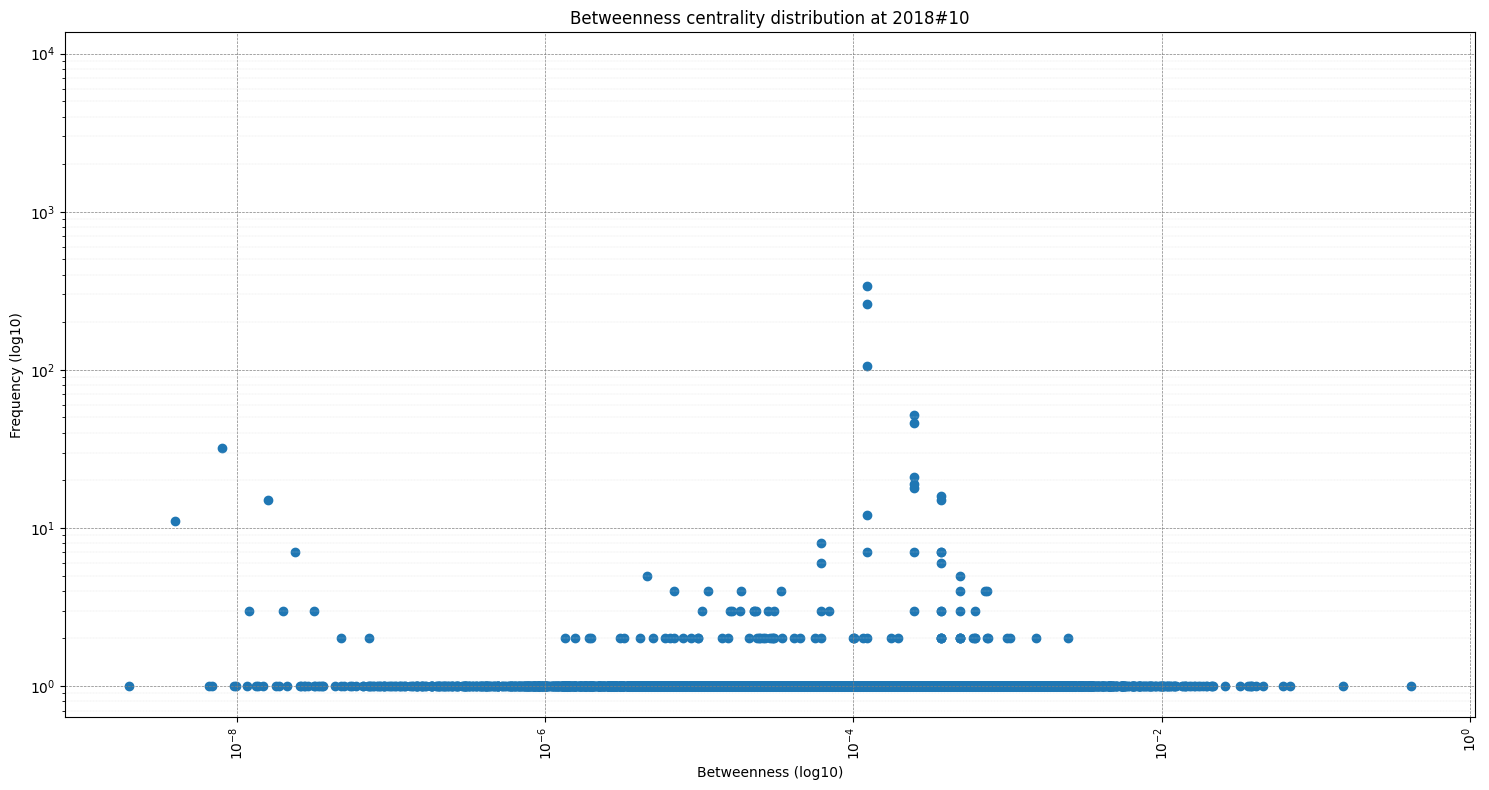

In [20]:
for p in (sorted_periods[0], sorted_periods[-1]):
    viz.create_plot(
        x_data=distributions[p]["betweenness_centrality"],
        y_data=None,
        y_data_labels=None,
        x_axis_label="Betweenness",
        y_axis_label="Frequency",
        title=f"Betweenness centrality distribution at {p}",
        is_histogram=True,
        log_scaled=True,
        log_axes="xy",
        save_file=f"betweenness_distribution_{p}.png",
    )

### Community sizes

In [21]:
y_data_counts_median = [
    np.median(distributions[x]["Total users per community"]["user"])
    for x in sorted_periods
]

y_data_counts_mean = [
    np.mean(distributions[x]["Total users per community"]["user"])
    for x in sorted_periods
]

y_data_counts_stdev = [
    np.std(distributions[x]["Total users per community"]["user"])
    for x in sorted_periods
]

y_data_counts_max = [
    np.max(distributions[x]["Total users per community"]["user"])
    for x in sorted_periods
]

y_data_counts_min = [
    np.min(distributions[x]["Total users per community"]["user"])
    for x in sorted_periods
]

y_data = (y_data_counts_median, y_data_counts_mean, y_data_counts_stdev, y_data_counts_max, y_data_counts_min)

y_data_labels = ("Median", "Mean", "Std. Deviation", "Maximum", "Minimum")

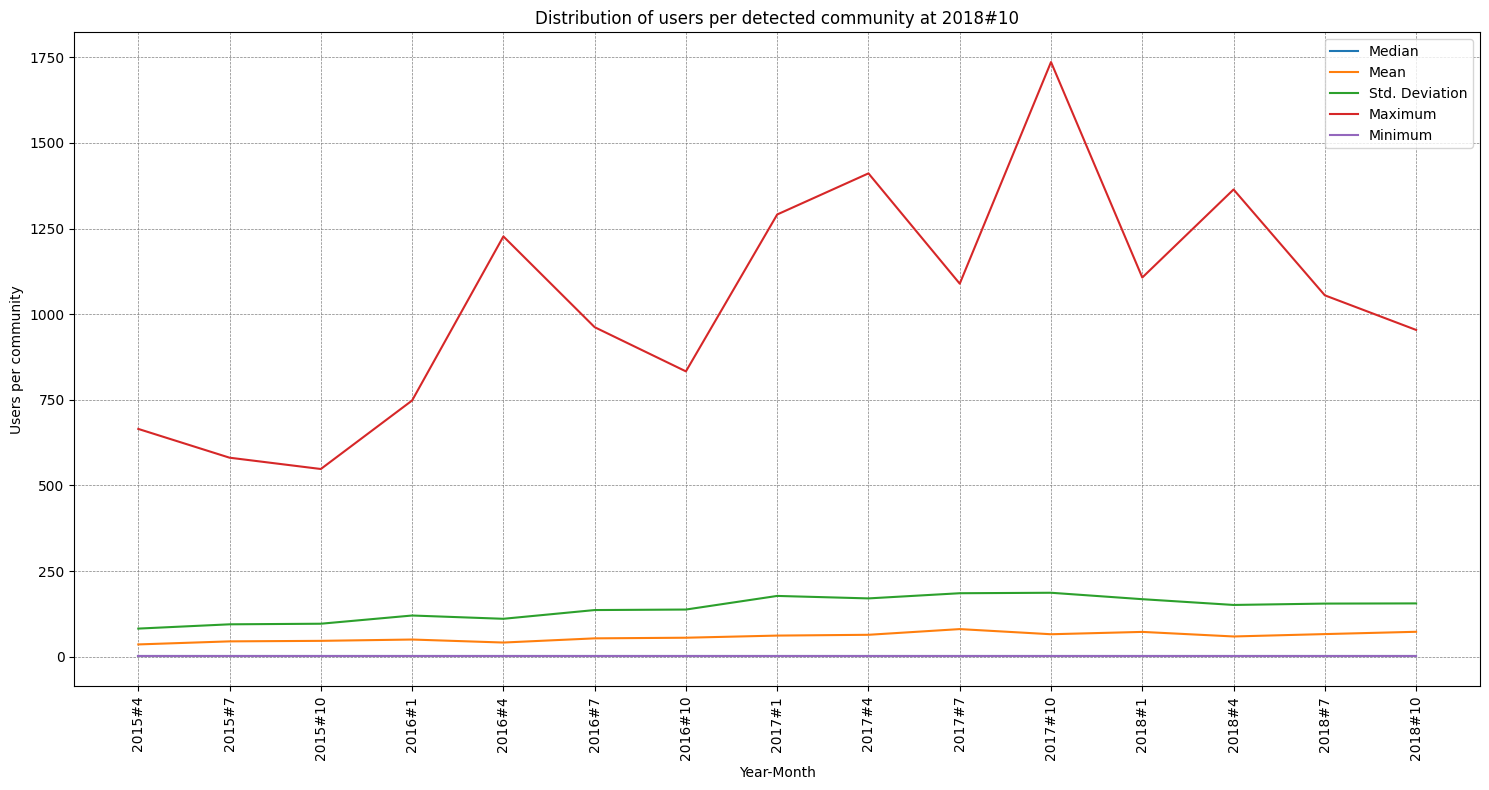

In [22]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-Month",
    y_axis_label="Users per community",
    title=f"Distribution of users per detected community at {p}",
    save_file=f"community_sizes_{p}.png",
)

### Sentiment analysis per community

In [23]:
y_data_counts_median = [
    np.median(distributions[x]["Median sentiment per community"]["sentiment"])
    for x in sorted_periods
]

y_data_counts_mean = [
    np.mean(distributions[x]["Median sentiment per community"]["sentiment"])
    for x in sorted_periods
]

y_data_counts_stdev = [
    np.std(distributions[x]["Median sentiment per community"]["sentiment"])
    for x in sorted_periods
]

y_data_counts_max = [
    np.max(distributions[x]["Median sentiment per community"]["sentiment"])
    for x in sorted_periods
]

y_data_counts_min = [
    np.min(distributions[x]["Median sentiment per community"]["sentiment"])
    for x in sorted_periods
]

y_data = (y_data_counts_median, y_data_counts_mean, y_data_counts_stdev, y_data_counts_max, y_data_counts_min)

y_data_labels = ("Median", "Mean", "Std. Deviation", "Maximum", "Minimum")

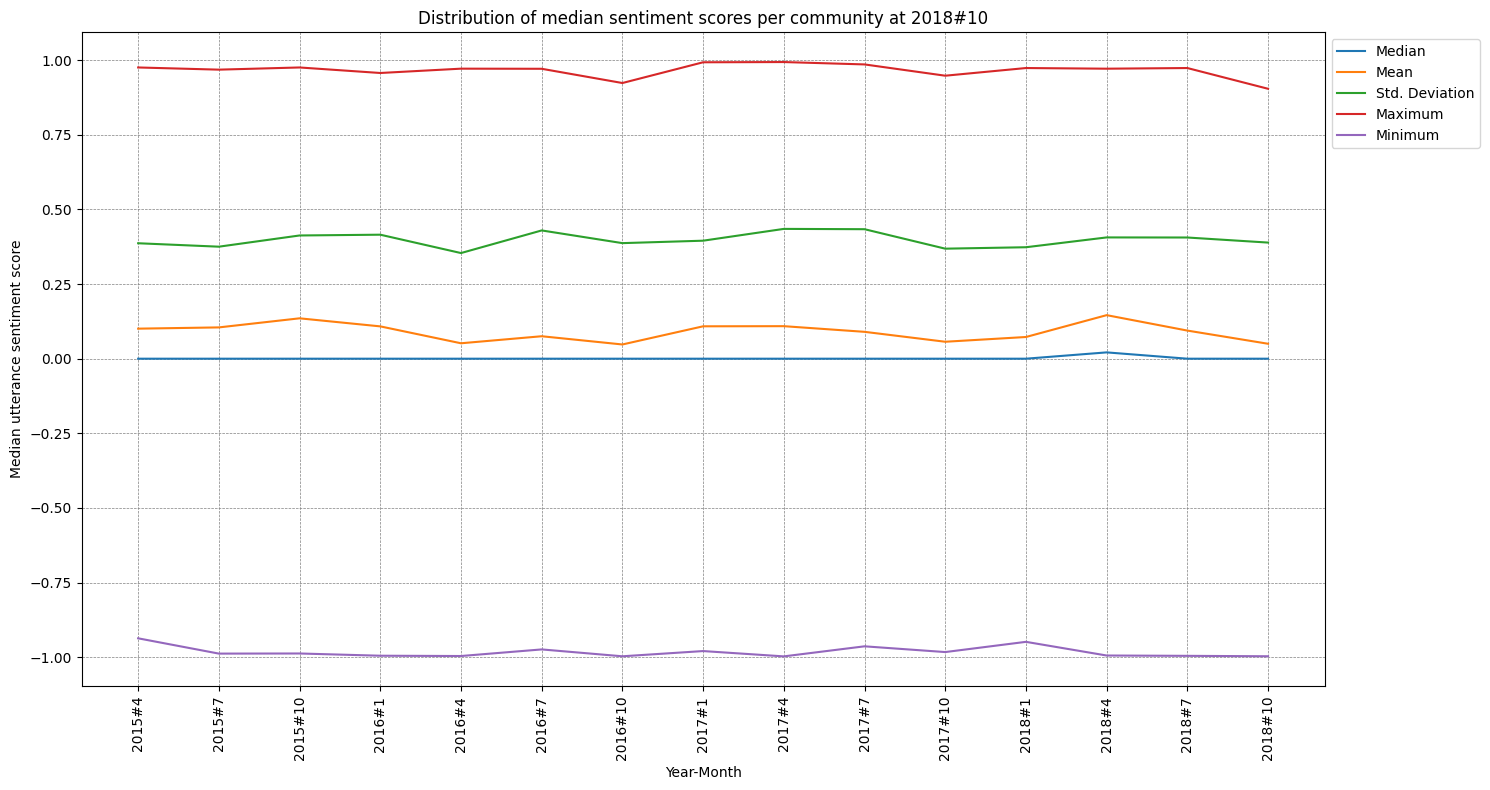

In [24]:
viz.create_plot(
    x_data=sorted_periods,
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-Month",
    y_axis_label="Median utterance sentiment score",
    title=f"Distribution of median sentiment scores per community at {p}",
    save_file=f"median_sentiment_scores_per_community_{p}.png",
)

## Stability analysis

In [25]:
reference_snapshot = sorted_periods[0]
other_snapshots = sorted_periods[1:]

### Degree distributions

In [26]:
psi_values = [
    viz_metrics.compute_psi(
        distributions[reference_snapshot]["degrees"],
        distributions[period]["degrees"],
        num_bins=50,
    )
    for period in other_snapshots
]

y_data = (psi_values,)

y_data_labels = ("PSI value",)

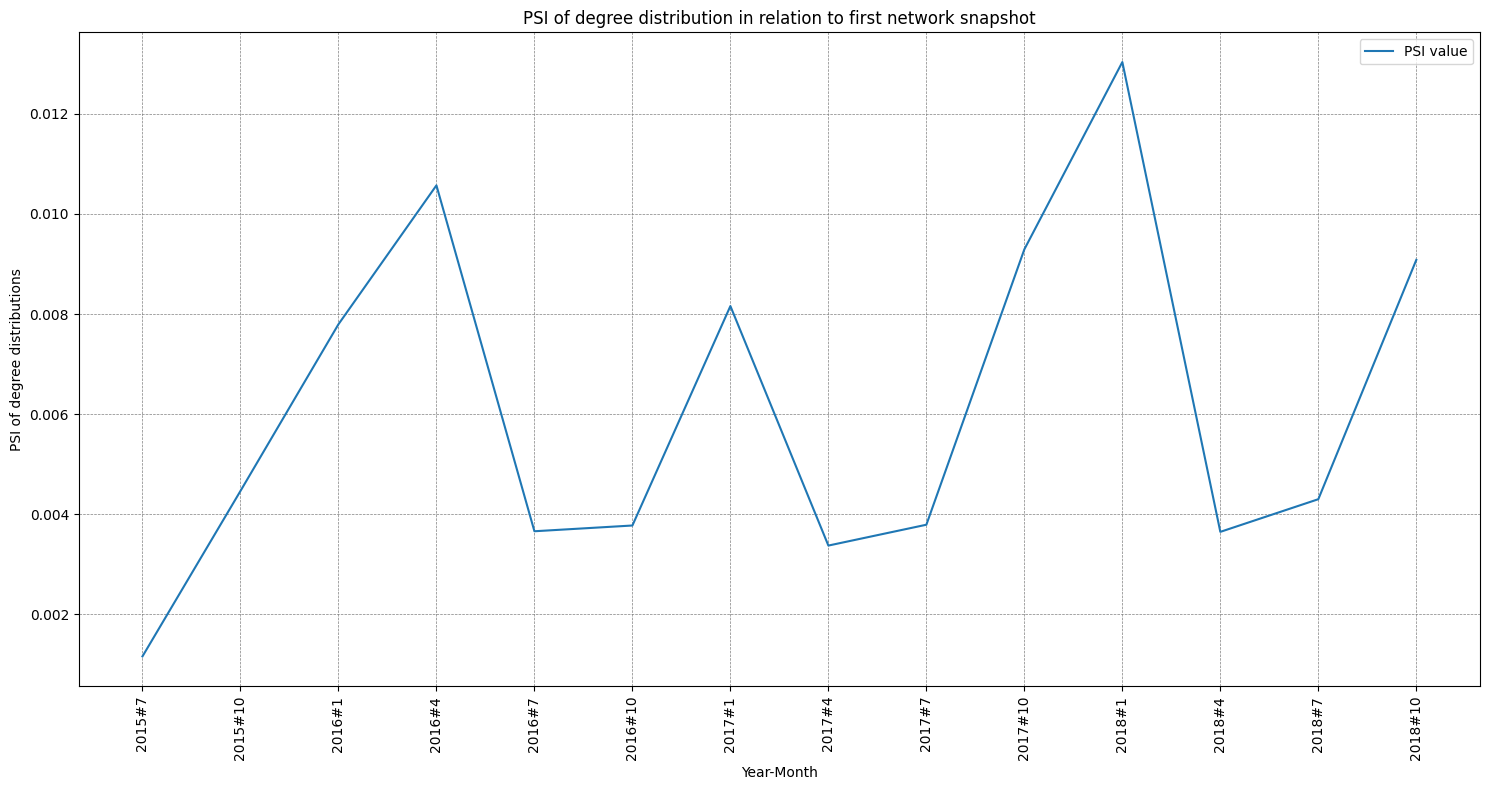

In [27]:
viz.create_plot(
    x_data=sorted_periods[1:],
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-Month",
    y_axis_label="PSI of degree distributions",
    title="PSI of degree distribution in relation to first network snapshot",
    save_file="psi_degree_distributions.png",
)

### Betweenness

In [28]:
# psi_values = [
#     viz_metrics.compute_psi(
#         distributions[sorted_periods[i - 1]]["betweenness_centrality"],
#         distributions[sorted_periods[i]]["betweenness_centrality"],
#         num_bins=50,
#     )
#     for i in range(1, len(sorted_periods))
# ]

psi_values = [
    viz_metrics.compute_psi(
        distributions[reference_snapshot]["betweenness_centrality"],
        distributions[period]["betweenness_centrality"],
        num_bins=50,
    )
    for period in other_snapshots
]

y_data = (psi_values,)

y_data_labels = ("PSI value",)

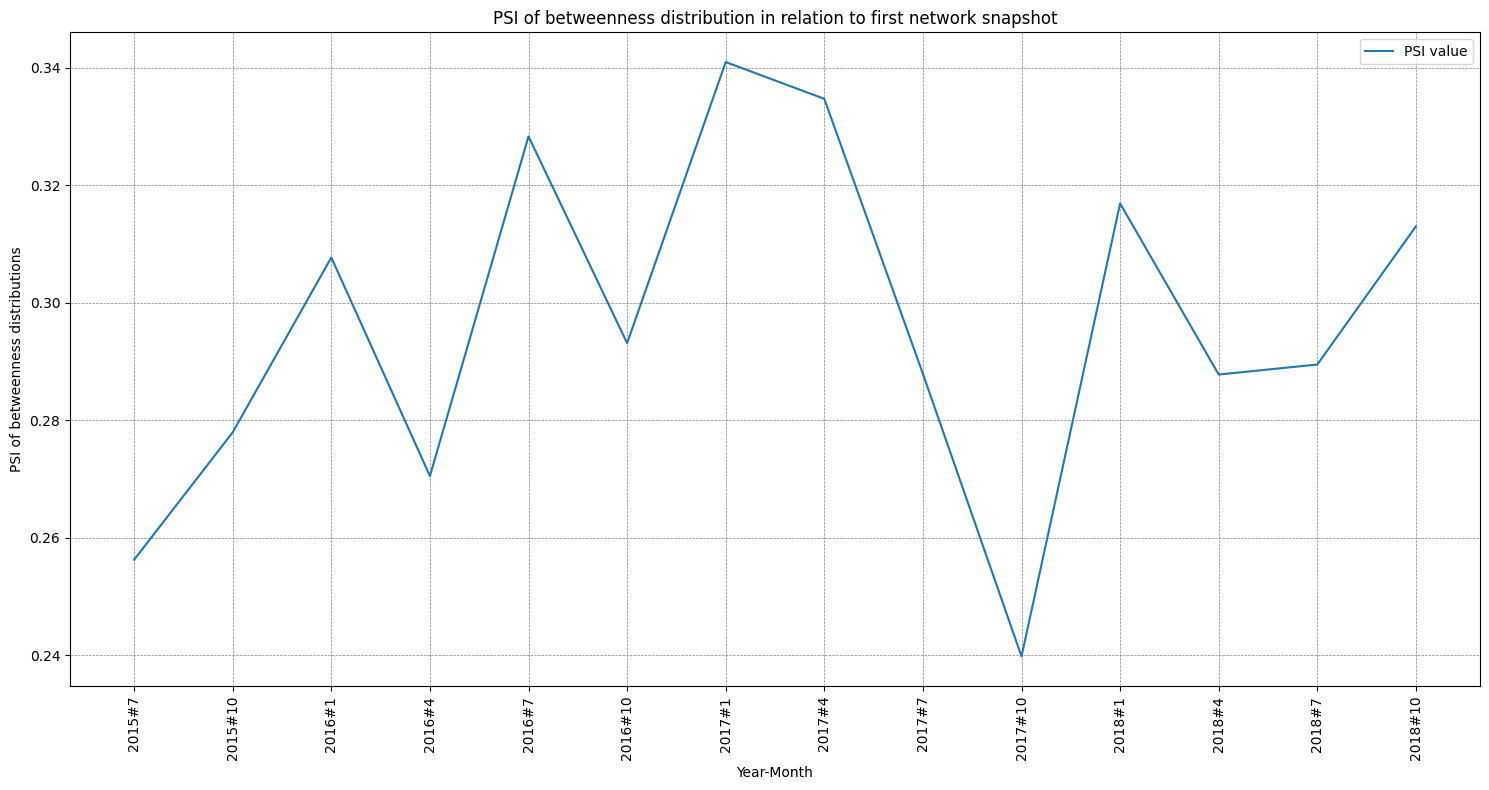

In [29]:
viz.create_plot(
    x_data=sorted_periods[1:],
    y_data=y_data,
    y_data_labels=y_data_labels,
    x_axis_label="Year-Month",
    y_axis_label="PSI of betweenness distributions",
    # title="PSI of betweenness distribution in relation to previous network snapshot",
    title="PSI of betweenness distribution in relation to first network snapshot",
    save_file="psi_betweenness_distributions.png",
)